In [617]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf
pd.set_option('display.max_column',None)
from sklearn.linear_model import LinearRegression
from scipy.stats import f_oneway 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [618]:
data = pd.read_csv('I:\\python\\vinodsirnotes\\HousePrices.csv')

In [619]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [620]:
data.shape

(1460, 81)

In [621]:
for i in data.columns:
    if data[i].isnull().sum()>500:
        print(i)

Alley
FireplaceQu
PoolQC
Fence
MiscFeature


In [622]:
for i in data.columns:
    if data[i].isnull().sum()>500:
        data.drop(i, axis=1, inplace = True)

In [623]:
data.drop(columns=['Id'], axis=1, inplace=True)

In [624]:
data.shape

(1460, 75)

In [625]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

C:\Users\T Yashwanth Kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice'>

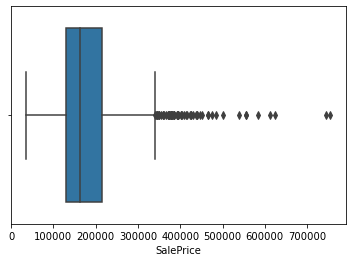

In [626]:
sns.boxplot(data.SalePrice,orient='h')

In [627]:
iqr = stats.iqr(data.SalePrice)
iqr

84025.0

In [628]:
q3=data.SalePrice.quantile(0.75)
q3

214000.0

In [629]:
q1=data.SalePrice.quantile(0.25)
q1

129975.0

In [630]:
upper = q3+(1.5*iqr)
upper

340037.5

In [631]:
lower = q1-(1.5*iqr)
lower

3937.5

In [632]:
data.SalePrice = np.where(data.SalePrice>upper, upper, data.SalePrice)

<AxesSubplot:>

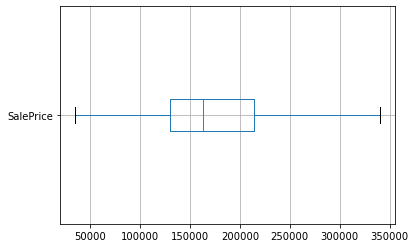

In [633]:
data.boxplot('SalePrice',vert = False)

### MSSubClass

In [634]:
data['MSSubClass'].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [635]:
data['MSSubClass'].isnull().sum()

0

In [636]:
model = ols('SalePrice ~ MSSubClass',data = data).fit()
anova = sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
MSSubClass,1.0,4.780171e+10,4.780171e+10,10.6535,0.0011
Residual,1458.0,6.541953e+12,4.486936e+09,NaN,NaN


In [637]:
tukey = pairwise_tukeyhsd(data['SalePrice'],data['MSSubClass'],alpha = 0.05)
print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj     lower        upper    reject
-----------------------------------------------------------------
    20     30  -85559.8957   -0.0 -110218.9719 -60900.8195   True
    20     40  -25264.6203 0.9999 -122023.4362  71494.1955  False
    20     45  -72797.9537 0.0011 -129073.9661 -16521.9412   True
    20     50  -38856.9606    0.0  -56953.5558 -20760.3654   True
    20     60   49075.1907   -0.0   35158.6497  62991.7317   True
    20     70   -14934.912 0.8362  -41181.3979  11311.5739  False
    20     75    2612.7234    1.0  -46301.2799  51526.7267  False
    20     80   -11738.629 0.9768  -38388.9771  14911.7192  False
    20     85  -33579.6203 0.3719  -77487.8633  10328.6226  False
    20     90  -47848.5434    0.0  -75851.9362 -19845.1506   True
    20    120   18473.1498 0.2391   -3811.6152  40757.9147  False
    20    160  -42742.2394    0.0  -68420.5706 -17063.9081   True
    20    

In [638]:
data['MSSubClass'].replace({20:40,30:45,190:180,},inplace=True)

In [639]:
tukey = pairwise_tukeyhsd(data['SalePrice'],data['MSSubClass'],alpha = 0.05)
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------
    40     45 -83482.0923   -0.0 -105618.0803 -61346.1042   True
    40     50 -38669.8153    0.0  -56093.5972 -21246.0334   True
    40     60   49262.336   -0.0   35870.4727  62654.1993   True
    40     70 -14747.7667 0.7533  -40028.8466  10533.3132  False
    40     75   2799.8687    1.0  -44327.4819  49927.2194  False
    40     80 -11551.4836 0.9477  -37221.8588  14118.8916  False
    40     85  -33392.475 0.2897  -75695.8129   8910.8629  False
    40     90 -47661.3981    0.0   -74635.985 -20686.8112   True
    40    120  18660.2951  0.162   -2801.6839  40122.2741  False
    40    160  -42555.094    0.0  -67288.5044 -17821.6837   True
    40    180  -58417.475    0.0  -88859.9265 -27975.0235   True
    45     50   44812.277    0.0   19009.8829  70614.6711   True
    45     60 132744.4283

In [640]:
data['MSSubClass'].replace({180:90,160:80,85:75},inplace=True)

In [641]:
tukey = pairwise_tukeyhsd(data['SalePrice'],data['MSSubClass'],alpha = 0.05)
print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj     lower        upper    reject
-----------------------------------------------------------------
    40     45  -83482.0923    0.0 -104564.4863 -62399.6982   True
    40     50  -38669.8153    0.0  -55264.2874 -22075.3432   True
    40     60    49262.336    0.0   36507.8776  62016.7945   True
    40     70  -14747.7667  0.612  -38825.5574   9330.0241  False
    40     75  -17306.9889 0.7052  -47763.2528   13149.275  False
    40     80  -27693.8593 0.0001  -45489.9529  -9897.7657   True
    40     90  -52337.9533    0.0  -72294.3101 -32381.5964   True
    40    120   18660.2951 0.1059   -1780.1703  39100.7605  False
    45     50    44812.277    0.0   20237.9847  69386.5693   True
    45     60  132744.4283    0.0  110581.4965 154907.3602   True
    45     70   68734.3256    0.0   38596.9842   98871.667   True
    45     75   66175.1034    0.0    30733.555 101616.6518   True
    45    

In [642]:
data['MSSubClass'].replace({75:80,70:50},inplace=True)

In [643]:
tukey = pairwise_tukeyhsd(data['SalePrice'],data['MSSubClass'],alpha = 0.05)
print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj     lower        upper    reject
-----------------------------------------------------------------
    40     45  -83482.0923    0.0 -103563.5239 -63400.6607   True
    40     50  -31633.9186    0.0  -45484.3329 -17783.5043   True
    40     60    49262.336    0.0   37113.4414  61411.2307   True
    40     80  -25312.1565    0.0  -40593.3735 -10030.9395   True
    40     90  -52337.9533    0.0  -71346.8103 -33329.0962   True
    40    120   18660.2951 0.0704    -809.6857  38130.2759  False
    45     50   51848.1737    0.0   29714.5207  73981.8266   True
    45     60  132744.4283    0.0  111633.7614 153855.0953   True
    45     80   58169.9358    0.0   35113.9124  81225.9591   True
    45     90    31144.139 0.0065    5465.3294  56822.9487   True
    45    120  102142.3874    0.0   76120.3819 128164.3929   True
    50     60   80896.2547    0.0   65591.6691  96200.8403   True
    50    

In [644]:
data['MSSubClass'].replace({120:40,90:50},inplace=True)

In [645]:
tukey = pairwise_tukeyhsd(data['SalePrice'],data['MSSubClass'],alpha = 0.05)
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------
    40     45 -86071.3198   -0.0 -104569.4502 -67573.1895   True
    40     50  -40658.184   -0.0  -51706.8211 -29609.5468   True
    40     60  46673.1085   -0.0   35662.1883  57684.0287   True
    40     80 -27901.3841    0.0  -41883.1466 -13919.6216   True
    45     50  45413.1359    0.0   25767.3324  65058.9394   True
    45     60 132744.4283   -0.0  113119.8117 152369.0449   True
    45     80  58169.9358    0.0   36736.9029  79602.9686   True
    50     60  87331.2925   -0.0    74485.393 100177.1919   True
    50     80  12756.7999 0.1613   -2711.4402    28225.04  False
    60     80 -74574.4926   -0.0  -90015.8148 -59133.1703   True
----------------------------------------------------------------


In [646]:
data['MSSubClass'].replace({80:50},inplace=True)

In [647]:
tukey = pairwise_tukeyhsd(data['SalePrice'],data['MSSubClass'],alpha = 0.05)
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj    lower        upper    reject
---------------------------------------------------------------
    40     45 -86071.3198   0.0 -103515.5614 -68627.0783   True
    40     50 -36236.9531   0.0  -45347.4224 -27126.4838   True
    40     60  46673.1085   0.0   36289.5104  57056.7066   True
    45     50  49834.3667   0.0   32010.9582  67657.7752   True
    45     60 132744.4283   0.0  114237.8795 151250.9772   True
    50     60  82910.0616   0.0   71901.3633  93918.7598   True
---------------------------------------------------------------


### MSZoning

In [648]:
data['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [649]:
data['MSZoning'].isnull().sum()

0

In [650]:
model = ols('SalePrice ~ MSZoning',data = data).fit()
anova = sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
MSZoning,4.0,9.108125e+11,2.277031e+11,58.3397,0.0
Residual,1455.0,5.678942e+12,3.903053e+09,NaN,NaN


In [651]:
tukey = pairwise_tukeyhsd(data['SalePrice'],data['MSZoning'],alpha = 0.05)
print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
 group1 group2   meandiff  p-adj     lower        upper    reject
-----------------------------------------------------------------
C (all)     FV 139011.5923    0.0   81051.4174 196971.7672   True
C (all)     RH   57030.375 0.1571  -11752.8314 125813.5814  False
C (all)     RL 112113.2659    0.0   57921.3903 166305.1414   True
C (all)     RM  50929.0826 0.0866   -4252.5965 106110.7616  False
     FV     RH -81981.2173    0.0 -129600.3602 -34362.0744   True
     FV     RL -26898.3265 0.0067  -48651.7783  -5144.8746   True
     FV     RM -88082.5097   -0.0 -112196.2194 -63968.8001   True
     RH     RL  55082.8909 0.0043   12129.8902  98035.8915   True
     RH     RM  -6101.2924 0.9957  -50296.5251  38093.9402  False
     RL     RM -61184.1833   -0.0  -73787.6944 -48580.6721   True
-----------------------------------------------------------------


In [652]:
data.MSZoning=data.MSZoning.replace({'C (all)':'RH','RM':'RH'})

In [653]:
tukey = pairwise_tukeyhsd(data['SalePrice'],data['MSZoning'],alpha = 0.05)
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------
    FV     RH -89769.6825    0.0 -110260.7416 -69278.6233   True
    FV     RL -26898.3265 0.0022  -45614.1614  -8182.4915   True
    RH     RL   62871.356    0.0   52524.9078  73217.8042   True
----------------------------------------------------------------


### LotFrontage

In [654]:
data.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

In [655]:
data.LotFrontage.isnull().sum()

259

In [656]:
data.LotFrontage.median()

69.0

In [657]:
data.LotFrontage.fillna(69.0,inplace = True)

In [658]:
data.LotFrontage.isnull().sum()

0

<AxesSubplot:>

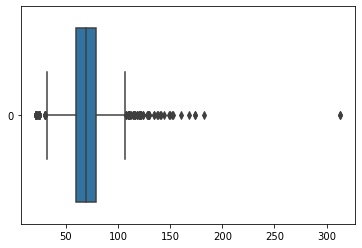

In [659]:
sns.boxplot(data=data.LotFrontage,orient = "h")

In [660]:
iqr = stats.iqr(data.LotFrontage)
iqr

19.0

In [661]:
Q1 = data.LotFrontage.quantile(0.25)
Q1

60.0

In [662]:
Q3 = data.LotFrontage.quantile(0.75)
Q3

79.0

In [663]:
lower_bound_LotFrontage = Q1-1.5*iqr 
lower_bound_LotFrontage

31.5

In [664]:
upper_bound_LotFrontage = Q3+1.5*iqr
upper_bound_LotFrontage

107.5

In [665]:
data.LotFrontage = np.where(data.LotFrontage>upper_bound_LotFrontage,upper_bound_LotFrontage,data.LotFrontage)

In [666]:
data.LotFrontage = np.where(data.LotFrontage<lower_bound_LotFrontage,lower_bound_LotFrontage,data.LotFrontage)

<AxesSubplot:>

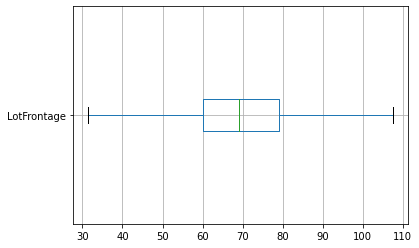

In [667]:
data.boxplot('LotFrontage',vert = False)

### LotArea

In [668]:
data.LotArea.value_counts()

7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17104     1
9717      1
Name: LotArea, Length: 1073, dtype: int64

In [669]:
data.LotArea.isnull().sum()

0

<AxesSubplot:>

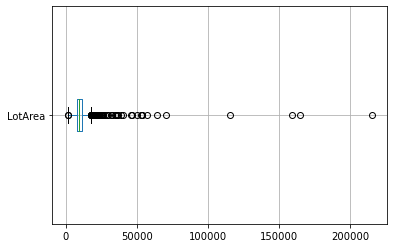

In [670]:
data.boxplot('LotArea',vert = False)

In [671]:
iqr = stats.iqr(data.LotArea)
iqr

4048.0

In [672]:
Q1 = data.LotArea.quantile(0.25)
Q1

7553.5

In [673]:
Q3 = data.LotArea.quantile(0.75)
Q3

11601.5

In [674]:
lower_bound_LotArea = Q1-(1.5*iqr)
lower_bound_LotArea

1481.5

In [675]:
upper_bound_Lotarea = Q3+(1.5*iqr)
upper_bound_Lotarea

17673.5

In [676]:
data.LotArea = np.where(data['LotArea']>upper_bound_Lotarea,upper_bound_Lotarea,data.LotArea)

In [677]:
data.LotArea = np.where(data.LotArea<lower_bound_LotArea,lower_bound_LotArea,data.LotArea)

<AxesSubplot:>

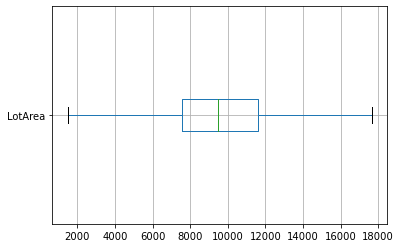

In [678]:
data.boxplot('LotArea',vert = False)

### Street

In [679]:
data.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [680]:
data.Street.isnull().sum()

0

In [681]:
model = ols('SalePrice ~ Street',data = data).fit()
anova = sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
Street,1.0,1.338868e+10,1.338868e+10,2.9683,0.0851
Residual,1458.0,6.576366e+12,4.510539e+09,NaN,NaN


In [682]:
data.drop(columns=['Street'],axis=1,inplace = True)

### LotShape

In [683]:
data.LotShape.value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [684]:
data.LotShape.isnull().sum()

0

In [685]:
model = ols("SalePrice ~ LotShape",data = data).fit()
anova = sm.stats.anova_lm(model)
print(anova.round(decimals = 4))

              df        sum_sq       mean_sq        F  PR(>F)
LotShape     3.0  5.473242e+11  1.824414e+11  43.9616     0.0
Residual  1456.0  6.042431e+12  4.150021e+09      NaN     NaN


In [686]:
tukey = pairwise_tukeyhsd(data['SalePrice'],data['LotShape'],alpha = 0.05)
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------
   IR1    IR2  23110.3326 0.1222   -3839.8231  50060.4883  False
   IR1    IR3  12249.1436 0.9336  -40685.1388   65183.426  False
   IR1    Reg -37395.6778    0.0  -46690.8659 -28100.4896   True
   IR2    IR3  -10861.189 0.9639  -69298.3887  47576.0106  False
   IR2    Reg -60506.0104    0.0  -86949.6972 -34062.3236   True
   IR3    Reg -49644.8214 0.0731 -102323.0515   3033.4088  False
----------------------------------------------------------------


In [687]:
data.LotShape = data.LotShape.replace({'IR2':'IR1','Reg':'IR3'})

In [688]:
tukey = pairwise_tukeyhsd(data['SalePrice'],data['LotShape'],alpha = 0.05)
print(tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj    lower       upper    reject
-------------------------------------------------------------
   IR1    IR3 -38669.524   0.0 -45581.8252 -31757.2228   True
-------------------------------------------------------------


### LandContour

In [689]:
data.LandContour.value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [690]:
data.LandContour.isnull().sum()

0

In [691]:
model = ols("SalePrice ~ LandContour",data = data).fit()
anova = sm.stats.anova_lm(model)
print(anova.round(decimals = 4))

                 df        sum_sq       mean_sq        F  PR(>F)
LandContour     3.0  1.871070e+11  6.236900e+10  14.1831     0.0
Residual     1456.0  6.402648e+12  4.397423e+09      NaN     NaN


In [692]:
tukey = pairwise_tukeyhsd(data['SalePrice'],data['LandContour'],alpha = 0.05)
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
   Bnk    HLS  77080.4906    0.0  44776.6506 109384.3306   True
   Bnk    Low  58336.8929 0.0002  22702.7532  93971.0325   True
   Bnk    Lvl  33575.8352 0.0005  11577.3918  55574.2786   True
   HLS    Low -18743.5978 0.5674 -56024.2223  18537.0267  False
   HLS    Lvl -43504.6554    0.0 -68080.7529  -18928.558   True
   Low    Lvl -24761.0577 0.1209 -53574.9154   4052.8001  False
---------------------------------------------------------------


In [693]:
data.LandContour = data.LandContour.replace({'Low':'HLS'})

In [694]:
tukey = pairwise_tukeyhsd(data['SalePrice'],data['LandContour'],alpha = 0.05)
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
   Bnk    HLS  69234.3334    0.0  43428.3774  95040.2895   True
   Bnk    Lvl  33575.8352 0.0003  13504.8789  53646.7915   True
   HLS    Lvl -35658.4982    0.0 -52980.3354 -18336.6611   True
---------------------------------------------------------------


### Utilities

In [695]:
data.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [696]:
data.Utilities.isnull().sum()

0

In [697]:
model = ols("SalePrice ~ Utilities",data = data).fit()
anova = sm.stats.anova_lm(model)
print(anova)

               df        sum_sq       mean_sq         F   PR(>F)
Utilities     1.0  1.587638e+09  1.587638e+09  0.351354  0.55344
Residual   1458.0  6.588167e+12  4.518633e+09       NaN      NaN


In [698]:
data.drop(columns=['Utilities'],axis=1,inplace = True)

### LotConfig

In [699]:
data.LotConfig.value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [700]:
data.LotConfig.isnull().sum()

0

In [701]:
model = ols("SalePrice ~ LotConfig",data = data).fit()
anova = sm.stats.anova_lm(model)
print(anova)

               df        sum_sq       mean_sq         F    PR(>F)
LotConfig     4.0  1.368598e+11  3.421495e+10  7.714793  0.000004
Residual   1455.0  6.452895e+12  4.434980e+09       NaN       NaN


In [702]:
tukey = pairwise_tukeyhsd(data['SalePrice'],data['LotConfig'],alpha = 0.05)
print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
 group1  group2   meandiff  p-adj     lower        upper    reject
------------------------------------------------------------------
 Corner CulDSac  35852.0131 0.0001   13994.9597  57709.0665   True
 Corner     FR2   -635.4976    1.0  -29439.5339  28168.5388  False
 Corner     FR3  31066.1939 0.8869  -60565.7853 122698.1732  False
 Corner  Inside  -3400.4886 0.9469  -15939.8794   9138.9022  False
CulDSac     FR2 -36487.5106 0.0187  -68980.9743   -3994.047   True
CulDSac     FR3  -4785.8191 0.9999   -97643.626  88071.9877  False
CulDSac  Inside -39252.5017    0.0  -58832.8232 -19672.1801   True
    FR2     FR3  31701.6915 0.8916  -63032.2201 126435.6031  False
    FR2  Inside   -2764.991 0.9987  -29881.9731   24351.991  False
    FR3  Inside -34466.6825   0.84 -125582.4211  56649.0561  False
------------------------------------------------------------------


In [703]:
data.LotConfig = data.LotConfig.replace({'FR2':'Corner','FR3':'Corner','Inside':'Corner'})

In [704]:
tukey = pairwise_tukeyhsd(data['SalePrice'],data['LotConfig'],alpha = 0.05)
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1  group2  meandiff  p-adj   lower      upper    reject
------------------------------------------------------------
Corner CulDSac 38401.7331   0.0 24478.6508 52324.8154   True
------------------------------------------------------------


### LandSlope

In [705]:
data.LandSlope.value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [706]:
data.LandSlope.isnull().sum()

0

In [707]:
model = ols("SalePrice ~ LandSlope",data = data).fit()
anova = sm.stats.anova_lm(model)
print(anova)

               df        sum_sq       mean_sq         F    PR(>F)
LandSlope     2.0  2.278116e+10  1.139058e+10  2.527203  0.080232
Residual   1457.0  6.566974e+12  4.507189e+09       NaN       NaN


In [708]:
data.drop(columns=['LandSlope'],axis=1,inplace = True)

# Neighborhood

In [709]:
#categorical
data['Neighborhood']

0       CollgCr
1       Veenker
2       CollgCr
3       Crawfor
4       NoRidge
         ...   
1455    Gilbert
1456     NWAmes
1457    Crawfor
1458      NAmes
1459    Edwards
Name: Neighborhood, Length: 1460, dtype: object

In [710]:
data['Neighborhood'].value_counts().shape

(25,)

In [711]:
data['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [712]:
data.Neighborhood.isnull().sum()

0

In [713]:
model=ols('SalePrice~Neighborhood',data=data).fit()
anova=sm.stats.anova_lm(model)

In [714]:
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
Neighborhood,24.0,3.845898e+12,1.602458e+11,83.8064,0.0
Residual,1435.0,2.743857e+12,1.912095e+09,NaN,NaN


In [715]:
tukey= pairwise_tukeyhsd(data['SalePrice'],data.Neighborhood,alpha=0.05)
print(tukey)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
 group1  group2   meandiff   p-adj     lower        upper     reject
--------------------------------------------------------------------
Blmngtn Blueste  -57370.8824 0.9903 -177179.2888   62437.5241  False
Blmngtn  BrDale  -90377.1324    0.0 -146201.3272  -34552.9375   True
Blmngtn BrkSide  -70036.8306    0.0 -114238.8514  -25834.8099   True
Blmngtn ClearCr   17694.5462 0.9999  -31583.4149   66972.5073  False
Blmngtn CollgCr    2236.4576    1.0   -38778.106   43251.0213  False
Blmngtn Crawfor   13548.2059    1.0  -31336.1356   58432.5473  False
Blmngtn Edwards  -66651.1824    0.0 -108696.5757   -24605.789   True
Blmngtn Gilbert   -2490.5849    1.0  -45340.2626   40359.0929  False
Blmngtn  IDOTRR  -94747.0986    0.0  -141706.387  -47787.8102   True
Blmngtn MeadowV  -96294.4118    0.0 -151266.2788  -41322.5448   True
Blmngtn Mitchel  -38600.7599 0.2285  -83713.5219    6512.0021  False
Blmngtn   NAmes  -49045.8579 0.002

In [716]:
data.Neighborhood=data.Neighborhood.replace({'Blueste':'Blmngtn','ClearCr':'Blmngtn','Crawfor':'Blmngtn','CollgCr':'Blmngtn',
                                             'Gilbert':'Blmngtn','Mitchel':'Blmngtn','NAmes':'Blmngtn','NPkVill':'Blmngtn','NWAmes':'Blmngtn',
                                             'SWISU':'Blmngtn','SawyerW':'Blmngtn','Somerst':'Blmngtn','Timber':'Blmngtn','Veenker':'Blmngtn',
                                             'Blueste':'BrDale','Blueste':'IDOTRR','OldTown': 'Edwards','IDOTRR':'Edwards',
                                             'BrDa1e BrkSideBrDa1e': 'Edwards','BrDa1e':'IDOTRR','MeadowV':'Edwards','IDOTRR':'Edwards',
                                             'NridgHt':'StoneBr','IDOTRR':'OldTown','BrkSide':'IDOTRR','NoRidge':'StoneBr','BrDale':'Edwards','IDOTRR':'Edwards','Sawyer':'Edwards'})

In [717]:
data.Neighborhood.value_counts().shape

(4,)

In [718]:
data.Neighborhood.unique()

array(['Blmngtn', 'StoneBr', 'Edwards', 'IDOTRR'], dtype=object)

In [719]:
tukey= pairwise_tukeyhsd(data['SalePrice'],data.Neighborhood,alpha=0.05)
print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
 group1  group2   meandiff  p-adj     lower       upper    reject
-----------------------------------------------------------------
Blmngtn Edwards -59916.2993    0.0  -67916.781 -51915.8175   True
Blmngtn  IDOTRR -58893.7706    0.0 -75948.4123 -41839.1289   True
Blmngtn StoneBr 104676.5284    0.0  93161.7193 116191.3375   True
Edwards  IDOTRR   1022.5287 0.9989 -16824.3453  18869.4027  False
Edwards StoneBr 164592.8277    0.0 151934.1967 177251.4586   True
 IDOTRR StoneBr  163570.299    0.0 143895.5936 183245.0043   True
-----------------------------------------------------------------


In [720]:
data.Neighborhood=data.Neighborhood.replace({'Edwards':'IDOTRR'})

In [721]:
tukey= pairwise_tukeyhsd(data['SalePrice'],data.Neighborhood,alpha=0.05)
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
 group1  group2   meandiff  p-adj    lower       upper    reject
----------------------------------------------------------------
Blmngtn  IDOTRR -59769.1728   0.0 -66678.5289 -52859.8167   True
Blmngtn StoneBr 104676.5284   0.0  94176.5876 115176.4692   True
 IDOTRR StoneBr 164445.7012   0.0 153142.7478 175748.6547   True
----------------------------------------------------------------


# Condition1

In [722]:
data['Condition1']

0        Norm
1       Feedr
2        Norm
3        Norm
4        Norm
        ...  
1455     Norm
1456     Norm
1457     Norm
1458     Norm
1459     Norm
Name: Condition1, Length: 1460, dtype: object

In [723]:
data.Condition1.value_counts().shape

(9,)

In [724]:
data.Condition1.unique()

array(['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA',
       'RRNe'], dtype=object)

In [725]:
data.Condition1.isnull().sum()

0

In [726]:
f_oneway(data.Condition1=='Norm',data.Condition1=='Feedr',
         data.Condition1=='PosN',data.Condition1=='Artery',
         data.Condition1=='RRAe',data.Condition1=='RRNn',
         data.Condition1=='RRAn',data.Condition1=='PosA',
         data.Condition1=='RRNe')

F_onewayResult(statistic=4183.8686858943165, pvalue=0.0)

In [727]:
tukey= pairwise_tukeyhsd(data['SalePrice'],data.Condition1,alpha=0.05)
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------
Artery  Feedr  10195.5336 0.9953   -27132.364  47523.4312  False
Artery   Norm  48264.7267    0.0   18127.7429  78401.7104   True
Artery   PosA  93595.0521 0.0065    15336.789 171853.3151   True
Artery   PosN  80537.8152 0.0002   24993.2227 136082.4078   True
Artery   RRAe   6120.0521    1.0  -62383.1461  74623.2503  False
Artery   RRAn  48925.8021 0.0597    -975.3268  98826.9309  False
Artery   RRNe  58470.0521 0.9503  -89424.1637 206364.2678  False
Artery   RRNn  80120.0521 0.1939  -16181.6841 176421.7883  False
 Feedr   Norm  38069.1931    0.0   14578.9014  61559.4848   True
 Feedr   PosA  83399.5185 0.0191    7452.7493 159346.2877   True
 Feedr   PosN  70342.2817  0.001   18104.7686 122579.7948   True
 Feedr   RRAe  -4075.4815    1.0  -69925.6461  61774.6831  False
 Feedr   RRAn  38730.2685

In [728]:
data.Condition1=data.Condition1.replace({'Feedr':'Artery','PosA':'Artery','RRAe':'Artery','RRNn':'Artery','RRNe':'Artery','RRAn':'Artery','PosN':'Norm'})

In [729]:
data.Condition1.unique()

array(['Norm', 'Artery'], dtype=object)

In [730]:
data.Condition1.value_counts().shape

(2,)

In [731]:
f_oneway(data.Condition1=='Norm',data.Condition1=='Artery')

F_onewayResult(statistic=3799.1011537846816, pvalue=0.0)

In [732]:
tukey= pairwise_tukeyhsd(data['SalePrice'],data.Condition1,alpha=0.05)
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
Artery   Norm 29785.4233   0.0 19424.9189 40145.9276   True
-----------------------------------------------------------


# Condition2

In [733]:
data['Condition2']

0       Norm
1       Norm
2       Norm
3       Norm
4       Norm
        ... 
1455    Norm
1456    Norm
1457    Norm
1458    Norm
1459    Norm
Name: Condition2, Length: 1460, dtype: object

In [734]:
data.Condition2.value_counts().shape

(8,)

In [735]:
data.Condition2.unique()

array(['Norm', 'Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe'],
      dtype=object)

In [736]:
data.Condition2.isnull().sum()

0

In [737]:
model=ols("SalePrice~ C(data.Condition2=='Norm')+C(data.Condition2=='Feedr')+C(data.Condition2=='PosN')+C(data.Condition2=='Artery')+C(data.Condition2=='RRAe')+C(data.Condition2=='RRNn')+C(data.Condition2=='RRAn')+C(data.Condition2=='PosA')",data=data).fit()
result = sm.stats.anova_lm(model,type=2)          


In [738]:
tukey= pairwise_tukeyhsd(data['SalePrice'],data.Condition2,alpha=0.05)
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------
Artery  Feedr  14666.6667    1.0 -151274.8585 180608.1918  False
Artery   Norm  71073.5889 0.8076   -72735.406 214882.5839  False
Artery   PosA    218500.0 0.1344  -30412.2878 467412.2878  False
Artery   PosN   155893.75 0.2788  -47342.2819 359129.7819  False
Artery   RRAe     83500.0 0.9718 -165412.2878 332412.2878  False
Artery   RRAn     30405.0    1.0 -218507.2878 279317.2878  False
Artery   RRNn     -9750.0    1.0 -212986.0319 193486.0319  False
 Feedr   Norm  56406.9223 0.4422  -26735.9195  139549.764  False
 Feedr   PosA 203833.3333 0.0912  -15686.6706 423353.3372  False
 Feedr   PosN 141227.0833 0.1628  -24714.4418 307168.6085  False
 Feedr   RRAe  68833.3333 0.9808 -150686.6706 288353.3372  False
 Feedr   RRAn  15738.3333    1.0 -203781.6706 235258.3372  False
 Feedr   RRNn -24416.6667

In [739]:
data.drop(columns=['Condition2'],axis=1,inplace = True)

# BldgType

In [740]:
data['BldgType']

0       1Fam
1       1Fam
2       1Fam
3       1Fam
4       1Fam
        ... 
1455    1Fam
1456    1Fam
1457    1Fam
1458    1Fam
1459    1Fam
Name: BldgType, Length: 1460, dtype: object

In [741]:
data.BldgType.value_counts().shape

(5,)

In [742]:
data.BldgType.isnull().sum()

0

In [743]:
data.BldgType.unique()

array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object)

In [744]:
f_oneway(data.BldgType=='1Fam',data.BldgType=='2fmCon',
         data.BldgType=='TwnhsE',data.BldgType=='Twnhs',
         data.BldgType=='Duplex')

F_onewayResult(statistic=3154.726364276677, pvalue=0.0)

In [745]:
tukey= pairwise_tukeyhsd(data['SalePrice'],data.BldgType,alpha=0.05)
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
  1Fam 2fmCon -53101.0587 0.0001 -85835.7864 -20366.3311   True
  1Fam Duplex -47992.2399    0.0 -73478.3061 -22506.1736   True
  1Fam  Twnhs -45621.6889 0.0001 -73548.9517 -17694.4261   True
  1Fam TwnhsE   -273.2642    1.0 -17900.5892  17354.0609  False
2fmCon Duplex   5108.8189 0.9971 -35732.2751  45949.9128  False
2fmCon  Twnhs   7479.3698  0.989  -34928.028  49886.7676  False
2fmCon TwnhsE  52827.7946 0.0008  16369.9014  89285.6877   True
Duplex  Twnhs    2370.551 0.9998 -34728.8367  39469.9387  False
Duplex TwnhsE  47718.9757 0.0002  17599.9593  77837.9921   True
 Twnhs TwnhsE  45348.4247 0.0012  13137.4393  77559.4102   True
---------------------------------------------------------------


In [746]:
data.BldgType=data.BldgType.replace({'TwnhsE':'1Fam','Duplex':'2fmCon','Twnhs':'2fmCon'})

In [747]:
data.BldgType.unique()

array(['1Fam', '2fmCon'], dtype=object)

In [748]:
data.BldgType.value_counts().shape

(2,)

In [749]:
tukey= pairwise_tukeyhsd(data['SalePrice'],data.BldgType,alpha=0.05)
print(tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj    lower       upper    reject
--------------------------------------------------------------
  1Fam 2fmCon -48416.8215   0.0 -60453.2486 -36380.3945   True
--------------------------------------------------------------


# HouseStyle

In [750]:
data.HouseStyle

0       2Story
1       1Story
2       2Story
3       2Story
4       2Story
         ...  
1455    2Story
1456    1Story
1457    2Story
1458    1Story
1459    1Story
Name: HouseStyle, Length: 1460, dtype: object

In [751]:
data.HouseStyle.unique()

array(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
       '2.5Fin'], dtype=object)

In [752]:
data.HouseStyle.value_counts().shape

(8,)

In [753]:
data.HouseStyle.isnull().sum()

0

In [754]:
f_oneway(data.HouseStyle=='2Story',data.HouseStyle=='1Story',
         data.HouseStyle=='1.5Fin',data.HouseStyle=='1.5Unf',
         data.HouseStyle=='SFoyer',data.HouseStyle=='SLvl',data.HouseStyle=='2.5Unf',data.HouseStyle=='2.5Fin')

F_onewayResult(statistic=591.4226264145556, pvalue=0.0)

In [755]:
tukey= pairwise_tukeyhsd(data['SalePrice'],data.HouseStyle,alpha=0.05)
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------
1.5Fin 1.5Unf -32246.4481 0.6154   -86412.873  21919.9769  False
1.5Fin 1Story  30647.7331    0.0   13432.5131   47862.953   True
1.5Fin 2.5Fin  60733.2394 0.1495   -9631.0106 131097.4895  False
1.5Fin 2.5Unf  14958.0974 0.9954  -45601.8068  75518.0016  False
1.5Fin 2Story  61240.2913    0.0   43098.8012  79381.7813   True
1.5Fin SFoyer  -7321.9616 0.9985  -42848.7027  28204.7796  False
1.5Fin   SLvl  24230.5904 0.1707   -4470.9317  52932.1125  False
1.5Unf 1Story  62894.1811 0.0067   10536.1337 115252.2285   True
1.5Unf 2.5Fin  92979.6875 0.0235    6978.9374 178980.4376   True
1.5Unf 2.5Unf  47204.5455 0.5977  -30977.9546 125387.0456  False
1.5Unf 2Story  93486.7393    0.0   40816.8714 146156.6073   True
1.5Unf SFoyer  24924.4865  0.919  -35961.8885  85810.8615  False
1.5Unf   SLvl  56477.0385

In [756]:
data.HouseStyle=data.HouseStyle.replace({'1.5Unf':'1.5Fin','2.5Fin':'1.5Fin','2.5Un':'1.5Fin','2.5Unf':'1.5Fin','SLvl':'1.5Fin','SFoyer':'1.5Fin','SLvl':'1.5Fin'})

In [757]:
data.HouseStyle.value_counts().shape

(3,)

In [758]:
tukey= pairwise_tukeyhsd(data['SalePrice'],data.HouseStyle,alpha=0.05)
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
1.5Fin 1Story 25446.9355   0.0 14964.1261 35929.7448   True
1.5Fin 2Story 56039.4937   0.0 44653.2361 67425.7512   True
1Story 2Story 30592.5582   0.0 21518.6991 39666.4173   True
-----------------------------------------------------------


# OverallQual

In [759]:
data.OverallQual

0       7
1       6
2       7
3       7
4       8
       ..
1455    6
1456    6
1457    7
1458    5
1459    5
Name: OverallQual, Length: 1460, dtype: int64

In [760]:
data.OverallQual.value_counts().shape

(10,)

In [761]:
data.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [762]:
data.OverallQual.isnull().sum()

0

In [763]:
model = ols("SalePrice ~ OverallQual",data = data).fit()
anova = sm.stats.anova_lm(model)
print(anova)

                 df        sum_sq       mean_sq            F  PR(>F)
OverallQual     1.0  4.397038e+12  4.397038e+12  2923.716813     0.0
Residual     1458.0  2.192716e+12  1.503921e+09          NaN     NaN


In [764]:
tukey= pairwise_tukeyhsd(data['SalePrice'],data.OverallQual,alpha=0.05)
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------
     1      2   1620.3333    1.0 -105341.7888 108582.4555  False
     1      3    37323.75 0.9387  -49572.6888 124220.1888  False
     1      4  58270.6552 0.4505  -25293.0417  141834.352  False
     1      5  83373.3476 0.0482     312.4098 166434.2854   True
     1      6 111453.0348 0.0009   28379.2958 194526.7737   True
     1      7 157316.0862    0.0   74204.2628 240427.9096   True
     1      8 217573.7321   -0.0   134229.518 300917.9462   True
     1      9 274892.7093   -0.0  190135.3017 359650.1169   True
     1     10 268613.1944   -0.0  181278.9874 355947.4015   True
     2      3  35703.4167 0.8673  -36841.8241 108248.6575  False
     2      4  56650.3218 0.2091  -11867.6489 125168.2926  False
     2      5  81753.0143 0.0055   13849.1095  149656.919   True
     2      6 109832.7014

In [765]:
data.OverallQual=data.OverallQual.replace({2:1,3:1,4:1,5:1})

In [766]:
data.OverallQual.value_counts().shape

(6,)

In [767]:
tukey= pairwise_tukeyhsd(data['SalePrice'],data.OverallQual,alpha=0.05)
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
     1      6  35969.8545   -0.0  28671.1975  43268.5114   True
     1      7  81832.9059   -0.0  74172.0657  89493.7461   True
     1      8 142090.5518   -0.0 132509.1503 151671.9534   True
     1      9  199409.529   -0.0 182229.0538 216590.0042   True
     1     10 193130.0141   -0.0  167153.404 219106.6243   True
     6      7  45863.0514   -0.0  37600.6185  54125.4844   True
     6      8 106120.6974   -0.0  96051.8056 116189.5892   True
     6      9 163439.6745   -0.0 145982.6401  180896.709   True
     6     10 157160.1597   -0.0 130999.8156 183320.5037   True
     7      8  60257.6459   -0.0  49923.2054  70592.0864   True
     7      9 117576.6231   -0.0   99965.089 135188.1572   True
     7     10 111297.1082   -0.0  85033.4131 137560.8033   True
     8      9  57318.9772   -0.0  38791.

In [768]:
data.OverallQual=data.OverallQual.replace({9:10})

In [769]:
tukey= pairwise_tukeyhsd(data['SalePrice'],data.OverallQual,alpha=0.05)
print(tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj    lower       upper    reject
--------------------------------------------------------------
     1      6  35969.8545  -0.0  28985.6258  42954.0831   True
     1      7  81832.9059  -0.0  74502.0969  89163.7149   True
     1      8 142090.5518  -0.0 132921.9198 151259.1839   True
     1     10 197556.5574  -0.0 183541.1629 211571.9519   True
     6      7  45863.0514  -0.0  37956.5666  53769.5363   True
     6      8 106120.6974  -0.0  96485.5764 115755.8184   True
     6     10 161586.7029  -0.0 147261.7937 175911.6122   True
     7      8  60257.6459  -0.0  50368.4161  70146.8757   True
     7     10 115723.6515  -0.0 101226.6057 130220.6973   True
     8     10  55466.0056  -0.0  39958.3498  70973.6614   True
--------------------------------------------------------------


# OverallCond

In [770]:
data.OverallCond

0       5
1       8
2       5
3       5
4       5
       ..
1455    5
1456    6
1457    9
1458    6
1459    6
Name: OverallCond, Length: 1460, dtype: int64

In [771]:
data.OverallCond.unique()

array([5, 8, 6, 7, 4, 2, 3, 9, 1], dtype=int64)

In [772]:
data.OverallCond.value_counts().shape

(9,)

In [773]:
data.OverallCond.isnull().sum()

0

In [774]:
f_oneway(data.OverallCond==5,data.OverallCond==8,data.OverallCond==6,data.OverallCond==7,
         data.OverallCond==4,data.OverallCond==2,data.OverallCond==3,data.OverallCond==9,data.OverallCond==1)

F_onewayResult(statistic=675.2674077553035, pvalue=0.0)

In [775]:
tukey= pairwise_tukeyhsd(data['SalePrice'],data.OverallCond,alpha=0.05)
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------
     1      2     70107.5  0.983 -141352.4077 281567.4077  False
     1      3     40929.4 0.9993 -155929.0607 237787.8607  False
     1      4  59438.4386 0.9901 -135283.0963 254159.9735  False
     1      5 136729.4689 0.4068   -56423.659 329882.5968  False
     1      6  90993.5357 0.8731 -102424.6946 284411.7661  False
     1      7  96819.0244 0.8293  -96686.8238 290324.8726  False
     1      8  94651.7361 0.8498  -99719.7688  289023.241  False
     1      9 147007.9545 0.3343  -50366.0683 344381.9774  False
     2      3    -29178.1 0.9893 -123745.8456  65389.6456  False
     2      4 -10669.0614    1.0 -100703.9497  79365.8269  False
     2      5  66621.9689 0.2901  -19968.6528 153212.5907  False
     2      6  20886.0357 0.9981  -66294.3336  108066.405  False
     2      7  26711.5244

In [776]:
data.OverallCond=data.OverallCond.replace({2:1,3:1,4:1,5:1,6:1,7:1,8:1,9:1})

In [777]:
data.OverallCond.value_counts().shape

(1,)

# YearBuilt

In [778]:
data.YearBuilt

0       2003
1       1976
2       2001
3       1915
4       2000
        ... 
1455    1999
1456    1978
1457    1941
1458    1950
1459    1965
Name: YearBuilt, Length: 1460, dtype: int64

In [779]:
data.YearBuilt.value_counts().shape

(112,)

In [780]:
data.YearBuilt.unique()

array([2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939, 1965,
       2005, 1962, 2006, 1960, 1929, 1970, 1967, 1958, 1930, 2002, 1968,
       2007, 1951, 1957, 1927, 1920, 1966, 1959, 1994, 1954, 1953, 1955,
       1983, 1975, 1997, 1934, 1963, 1981, 1964, 1999, 1972, 1921, 1945,
       1982, 1998, 1956, 1948, 1910, 1995, 1991, 2009, 1950, 1961, 1977,
       1985, 1979, 1885, 1919, 1990, 1969, 1935, 1988, 1971, 1952, 1936,
       1923, 1924, 1984, 1926, 1940, 1941, 1987, 1986, 2008, 1908, 1892,
       1916, 1932, 1918, 1912, 1947, 1925, 1900, 1980, 1989, 1992, 1949,
       1880, 1928, 1978, 1922, 1996, 2010, 1946, 1913, 1937, 1942, 1938,
       1974, 1893, 1914, 1906, 1890, 1898, 1904, 1882, 1875, 1911, 1917,
       1872, 1905], dtype=int64)

In [781]:
data.YearBuilt.isnull().sum()

0

C:\Users\T Yashwanth Kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearBuilt'>

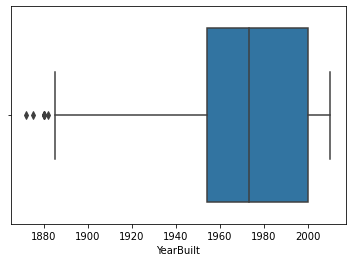

In [782]:
sns.boxplot(data.YearBuilt)

In [783]:
iqr=stats.iqr(data.YearBuilt)
q1=data.YearBuilt.quantile(0.25)
q3=data.YearBuilt.quantile(0.75)
print('q1',q1)
print('q3',q3)

q1 1954.0
q3 2000.0


In [784]:
lower=q1-1.5*iqr

In [785]:
lower

1885.0

In [786]:
#capping variables at upper and lower limits 
data.YearBuilt=np.where(data.YearBuilt<lower,lower,data.YearBuilt)

C:\Users\T Yashwanth Kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearBuilt'>

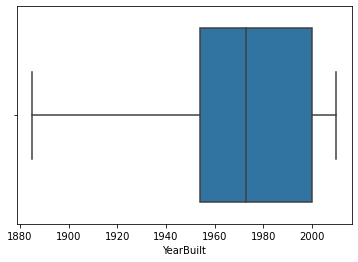

In [787]:
sns.boxplot(data.YearBuilt)

# YearRemodAdd

In [788]:
data.YearRemodAdd

0       2003
1       1976
2       2002
3       1970
4       2000
        ... 
1455    2000
1456    1988
1457    2006
1458    1996
1459    1965
Name: YearRemodAdd, Length: 1460, dtype: int64

In [789]:
data.YearRemodAdd.value_counts().shape

(61,)

In [790]:
data.YearRemodAdd.isnull().sum()

0

In [791]:
data.YearRemodAdd.unique()

array([2003, 1976, 2002, 1970, 2000, 1995, 2005, 1973, 1950, 1965, 2006,
       1962, 2007, 1960, 2001, 1967, 2004, 2008, 1997, 1959, 1990, 1955,
       1983, 1980, 1966, 1963, 1987, 1964, 1972, 1996, 1998, 1989, 1953,
       1956, 1968, 1981, 1992, 2009, 1982, 1961, 1993, 1999, 1985, 1979,
       1977, 1969, 1958, 1991, 1971, 1952, 1975, 2010, 1984, 1986, 1994,
       1988, 1954, 1957, 1951, 1978, 1974], dtype=int64)

C:\Users\T Yashwanth Kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


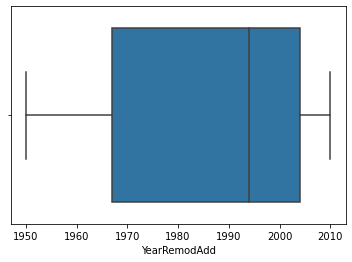

In [792]:
sns.boxplot(data.YearRemodAdd);

# YearRemodAdd

In [793]:
data.YearRemodAdd

0       2003
1       1976
2       2002
3       1970
4       2000
        ... 
1455    2000
1456    1988
1457    2006
1458    1996
1459    1965
Name: YearRemodAdd, Length: 1460, dtype: int64

In [794]:
data.YearRemodAdd.value_counts().shape

(61,)

In [795]:
data.YearRemodAdd.isnull().sum()

0

In [796]:
data.YearRemodAdd.unique()

array([2003, 1976, 2002, 1970, 2000, 1995, 2005, 1973, 1950, 1965, 2006,
       1962, 2007, 1960, 2001, 1967, 2004, 2008, 1997, 1959, 1990, 1955,
       1983, 1980, 1966, 1963, 1987, 1964, 1972, 1996, 1998, 1989, 1953,
       1956, 1968, 1981, 1992, 2009, 1982, 1961, 1993, 1999, 1985, 1979,
       1977, 1969, 1958, 1991, 1971, 1952, 1975, 2010, 1984, 1986, 1994,
       1988, 1954, 1957, 1951, 1978, 1974], dtype=int64)

C:\Users\T Yashwanth Kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


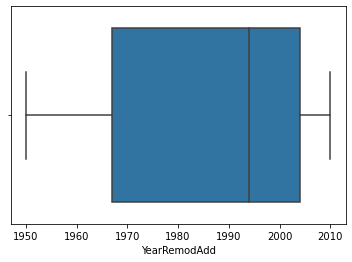

In [797]:
sns.boxplot(data.YearRemodAdd);

# RoofStyle

In [798]:
data.RoofStyle

0       Gable
1       Gable
2       Gable
3       Gable
4       Gable
        ...  
1455    Gable
1456    Gable
1457    Gable
1458      Hip
1459    Gable
Name: RoofStyle, Length: 1460, dtype: object

In [799]:
data.RoofStyle.value_counts().shape

(6,)

In [800]:
data.RoofStyle.unique()

array(['Gable', 'Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed'], dtype=object)

In [801]:
data.RoofStyle.isnull().sum()

0

In [802]:
f_oneway(data.RoofStyle=='Gable',data.RoofStyle=='Hip',data.RoofStyle=='Gambrel',data.RoofStyle=='Mansard',data.RoofStyle=='Flat',data.RoofStyle=='Shed')

F_onewayResult(statistic=2409.2957757029344, pvalue=0.0)

In [803]:
tukey= pairwise_tukeyhsd(data['SalePrice'],data.RoofStyle,alpha=0.05)
print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
 group1  group2   meandiff  p-adj     lower        upper    reject
------------------------------------------------------------------
   Flat   Gable -24595.1884 0.7614  -76886.2344  27695.8575  False
   Flat Gambrel -45780.9091 0.5313 -122583.6157  31021.7975  False
   Flat     Hip  11404.0542 0.9902  -41760.2121  64568.3205  False
   Flat Mansard -14121.5714 0.9975 -102010.3087  73767.1658  False
   Flat    Shed     30310.0 0.9905 -112086.0291 172706.0291  False
  Gable Gambrel -21185.7207 0.8954  -77982.7992  35611.3579  False
  Gable     Hip  35999.2426   -0.0   23602.0009  48396.4844   True
  Gable Mansard   10473.617 0.9983  -60601.5723  81548.8063  False
  Gable    Shed  54905.1884 0.8461  -77774.4313 187584.8082  False
Gambrel     Hip  57184.9633  0.053    -417.0666 114786.9932  False
Gambrel Mansard  31659.3377 0.9191  -58982.7319 122301.4072  False
Gambrel    Shed  76090.9091 0.6601  -68020.7967 220202.6149  F

In [804]:
data.RoofStyle=data.RoofStyle.replace({
    
'Gable':'Flat',
'Gambrel':'Flat',
'Mansard':'Flat',
'Shed':'Flat'
})

In [805]:
tukey= pairwise_tukeyhsd(data['SalePrice'],data.RoofStyle,alpha=0.05)
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
  Flat    Hip 35769.4128   0.0 27269.6868 44269.1388   True
-----------------------------------------------------------


# RoofMatl

In [806]:
data.RoofMatl

0       CompShg
1       CompShg
2       CompShg
3       CompShg
4       CompShg
         ...   
1455    CompShg
1456    CompShg
1457    CompShg
1458    CompShg
1459    CompShg
Name: RoofMatl, Length: 1460, dtype: object

In [807]:
data.RoofMatl.value_counts().shape

(8,)

In [808]:
data.RoofMatl.unique()

array(['CompShg', 'WdShngl', 'Metal', 'WdShake', 'Membran', 'Tar&Grv',
       'Roll', 'ClyTile'], dtype=object)

In [809]:
data.RoofMatl.isnull().sum()

0

In [810]:
f_oneway(data.RoofMatl=='CompShg',data.RoofMatl=='WdShngl',data.RoofMatl=='Metal',data.RoofMatl=='WdShake',data.RoofMatl=='Membran',data.RoofMatl=='Tar&Grv',data.RoofMatl=='Roll',data.RoofMatl=='ClyTile')

F_onewayResult(statistic=39767.25394076204, pvalue=0.0)

In [811]:
tukey= pairwise_tukeyhsd(data['SalePrice'],data.RoofMatl,alpha=0.05)
print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
 group1  group2   meandiff  p-adj     lower        upper    reject
------------------------------------------------------------------
ClyTile CompShg  16563.7699    1.0 -186341.4527 219468.9924  False
ClyTile Membran     81500.0 0.9892 -205351.3171 368351.3171  False
ClyTile   Metal     20000.0    1.0 -266851.3171 306851.3171  False
ClyTile    Roll    -23000.0    1.0 -309851.3171 263851.3171  False
ClyTile Tar&Grv  25406.3636    1.0 -186447.3743 237260.1015  False
ClyTile WdShake     81400.0 0.9543 -140794.0748 303594.0748  False
ClyTile WdShngl 131102.0833  0.609   -87984.229 350188.3957  False
CompShg Membran  64936.2301 0.9784 -137968.9924 267841.4527  False
CompShg   Metal   3436.2301    1.0 -199468.9924 206341.4527  False
CompShg    Roll -39563.7699  0.999 -242468.9924 163341.4527  False
CompShg Tar&Grv   8842.5938 0.9999  -52548.4272  70233.6147  False
CompShg WdShake  64836.2301 0.3733  -26032.1256 155704.5859  F

In [812]:
data.RoofMatl=data.RoofMatl.replace({
    
'CompShg':'ClyTile',
'Membran':'ClyTile',
'Metal':'ClyTile',
'Roll':'ClyTile',
'Tar&Grv':'ClyTile',
'WdShake':'ClyTile',
'Membran':'CompShg',
'Roll':'CompShg',
'Tar&Grv':'CompShg',
'WdShake':'CompShg','CompShg':'ClyTile'
})

In [813]:
tukey= pairwise_tukeyhsd(data['SalePrice'],data.RoofMatl,alpha=0.05)
print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
 group1  group2   meandiff  p-adj     lower       upper    reject
-----------------------------------------------------------------
ClyTile CompShg  24832.5941 0.2601 -12335.4509  62000.6391  False
ClyTile WdShngl 114547.4552 0.0001  50436.7177 178658.1927   True
CompShg WdShngl  89714.8611 0.0124  15840.3311 163589.3911   True
-----------------------------------------------------------------


In [814]:
data.RoofMatl=data.RoofMatl.replace({'CompShg':'ClyTile'})

In [815]:
tukey= pairwise_tukeyhsd(data['SalePrice'],data.RoofMatl,alpha=0.05)
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
 group1  group2   meandiff  p-adj   lower       upper    reject
---------------------------------------------------------------
ClyTile WdShngl 114240.0366   0.0 60611.2217 167868.8514   True
---------------------------------------------------------------


# GrLivArea

In [816]:
data.GrLivArea.value_counts().sum()

1460

In [817]:
#GrLivArea is continuous

In [818]:
data.GrLivArea.isnull().sum()

0

<AxesSubplot:>

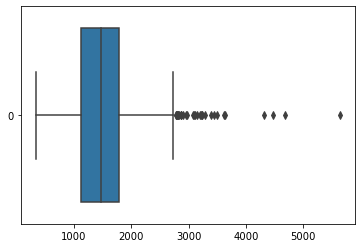

In [819]:
sns.boxplot(data=data.GrLivArea,orient="h")

In [820]:
# Replace the Outliers with the upperboud(Q3+1.5(Q3-Q1))

In [821]:
iqr = stats.iqr(data.GrLivArea)
q3=data.GrLivArea.quantile(0.75)
q1=data.GrLivArea.quantile(0.25)

In [822]:
upper = q3+(1.5*iqr)
upper

2747.625

In [823]:
lower = q1-(1.5*iqr)
lower

158.625

In [824]:
data.GrLivArea = np.where(data.GrLivArea>upper, upper, data.GrLivArea)

<AxesSubplot:>

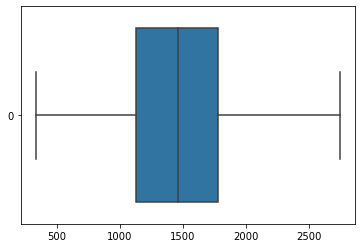

In [825]:
sns.boxplot(data=data.GrLivArea,orient="h")

# BsmtFullBath

In [826]:
data.BsmtFullBath.value_counts()

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

In [827]:
data.BsmtFullBath.isnull().sum()

0

In [828]:
#if any Null - fillna it with Mode Value

In [829]:
f_oneway(data.BsmtFullBath==0, data.BsmtFullBath==1, data.BsmtFullBath==2, data.BsmtFullBath==3)

F_onewayResult(statistic=1008.434472352709, pvalue=0.0)

In [830]:
# p-value is 0, rejevct H0, so at least one category is different

In [831]:
model = ols('SalePrice ~ BsmtFullBath', data = data).fit()
result = sm.stats.anova_lm(model, type = 2)
print(result.round(decimals=5))

                  df        sum_sq       mean_sq         F  PR(>F)
BsmtFullBath     1.0  3.784601e+11  3.784601e+11  88.83732     0.0
Residual      1458.0  6.211295e+12  4.260147e+09       NaN     NaN


In [832]:
tukey = pairwise_tukeyhsd(data.SalePrice, data.BsmtFullBath, alpha=0.05)
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------
     0      1  32885.7746    0.0   23896.9796  41874.5695   True
     0      2  44111.3455 0.0469     402.4343  87820.2567   True
     0      3  15376.6121 0.9954 -152541.2712 183294.4955  False
     1      2  11225.5709 0.9128   -32654.547  55105.6888  False
     1      3 -17509.1624 0.9933 -185471.6921 150453.3672  False
     2      3 -28734.7333  0.974 -202058.3666 144588.8999  False
----------------------------------------------------------------


In [833]:
data.BsmtFullBath.replace({2:1,3:0},inplace=True)

In [834]:
tukey = pairwise_tukeyhsd(data.SalePrice, data.BsmtFullBath, alpha=0.05)
print(tukey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper   reject
----------------------------------------------------------
     0      1 33147.0753   0.0 26347.4775 39946.673   True
----------------------------------------------------------


# BsmtHalfBath 

In [835]:
data.BsmtHalfBath.value_counts()

0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64

In [836]:
data.BsmtHalfBath.isnull().sum()

0

In [837]:
model = ols('SalePrice ~ BsmtHalfBath', data = data).fit()
result = sm.stats.anova_lm(model, type = 2)
print(result.round(decimals=5))

                  df        sum_sq       mean_sq        F  PR(>F)
BsmtHalfBath     1.0  4.802989e+09  4.802989e+09  1.06345  0.3026
Residual      1458.0  6.584952e+12  4.516428e+09      NaN     NaN


In [838]:
data.drop(columns="BsmtHalfBath", axis=1, inplace=True)

# FullBath

In [839]:
data.FullBath.value_counts()

2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64

In [840]:
data.FullBath.isnull().sum()

0

In [841]:
f_oneway(data.FullBath==0, data.FullBath==1, data.FullBath==2, data.FullBath==3)

F_onewayResult(statistic=836.1600134513186, pvalue=0.0)

In [842]:
model = ols('SalePrice ~ FullBath', data = data).fit()
result = sm.stats.anova_lm(model, type = 2)
print(result.round(decimals=5))

              df        sum_sq       mean_sq          F  PR(>F)
FullBath     1.0  2.247429e+12  2.247429e+12  754.60759     0.0
Residual  1458.0  4.342326e+12  2.978275e+09        NaN     NaN


In [843]:
tukey = pairwise_tukeyhsd(data.SalePrice, data.FullBath, alpha=0.05)
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
     0      1 -25706.8671 0.4892 -72384.3071  20970.5729  False
     0      2  49156.3038 0.0342   2527.8623  95784.7453   True
     0      3 120062.7172    0.0  67764.2842 172361.1501   True
     1      2  74863.1709    0.0    67451.04  82275.3018   True
     1      3 145769.5843    0.0 120953.1741 170585.9945   True
     2      3  70906.4134    0.0  46182.2882  95630.5385   True
---------------------------------------------------------------


In [844]:
data.FullBath.replace({2:0, 1:0},inplace=True)

In [845]:
tukey = pairwise_tukeyhsd(data.SalePrice, data.FullBath, alpha=0.05)
print(tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2   meandiff  p-adj   lower       upper    reject
-------------------------------------------------------------
     0      3 105316.6921   0.0 82735.2655 127898.1188   True
-------------------------------------------------------------


In [846]:
data.FullBath.value_counts()

0    1427
3      33
Name: FullBath, dtype: int64

# BedroomAbvGr'

In [847]:
data.BedroomAbvGr.value_counts()

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

In [848]:
data.BedroomAbvGr.isnull().sum()

0

In [849]:
f_oneway(data.BedroomAbvGr==0, data.BedroomAbvGr==1, data.BedroomAbvGr==2, data.BedroomAbvGr==3, data.BedroomAbvGr==4, data.BedroomAbvGr==5, data.BedroomAbvGr==6, data.BedroomAbvGr==7, data.BedroomAbvGr==8)

F_onewayResult(statistic=735.1704400958564, pvalue=0.0)

In [850]:
model = ols('SalePrice ~ BedroomAbvGr', data = data).fit()
result = sm.stats.anova_lm(model, type = 2)
print(result.round(decimals=5))

                  df        sum_sq       mean_sq         F  PR(>F)
BedroomAbvGr     1.0  2.165568e+11  2.165568e+11  49.54182     0.0
Residual      1458.0  6.373198e+12  4.371192e+09       NaN     NaN


In [851]:
tukey = pairwise_tukeyhsd(data.SalePrice, data.BedroomAbvGr, alpha=0.05)
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------
     0      1 -47365.2567 0.7004 -132946.1563  38215.6429  False
     0      2 -59094.8552 0.3524 -140636.0395   22446.329  False
     0      3 -34210.3389 0.9066 -115377.8672  46957.1894  False
     0      4  -6119.5129    1.0  -88116.9148   75877.889  False
     0      5  -33180.369 0.9573 -124874.1901   58513.452  False
     0      6 -70220.4167 0.5275 -180422.6744  39981.8411  False
     0      8 -13999.4167    1.0 -227951.6657 199952.8324  False
     1      2 -11729.5985 0.9347  -41634.8203  18175.6232  False
     1      3  13154.9177 0.8651   -15715.919  42025.7544  False
     1      4  41245.7438 0.0016   10118.0796  72373.4079   True
     1      5  14184.8876  0.991  -37323.5037  65693.2789  False
     1      6   -22855.16 0.9888 -102791.9799  57081.6599  False
     1      8    33365.84

In [852]:
data.BedroomAbvGr.replace({2:0, 1:0, 5:0, 6:0, 8:0},inplace=True)

In [853]:
tukey = pairwise_tukeyhsd(data.SalePrice, data.BedroomAbvGr, alpha=0.05)
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
     0      3 21605.8035   0.0 12532.9296 30678.6773   True
     0      4 49696.6295   0.0 36911.5984 62481.6606   True
     3      4  28090.826   0.0 16274.4532 39907.1988   True
-----------------------------------------------------------


In [854]:
data.BedroomAbvGr.value_counts()

3    804
0    443
4    213
Name: BedroomAbvGr, dtype: int64

# KitchenAbvGr'

In [855]:
data.KitchenAbvGr.value_counts()

1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64

In [856]:
data.KitchenAbvGr.isnull().sum()

0

In [857]:
f_oneway(data.KitchenAbvGr==0, data.KitchenAbvGr==1, data.KitchenAbvGr==2, data.KitchenAbvGr==3)

F_onewayResult(statistic=14448.478143372708, pvalue=0.0)

In [858]:
model = ols('SalePrice ~ KitchenAbvGr', data = data).fit()
result = sm.stats.anova_lm(model, type = 2)
print(result.round(decimals=5))

                  df        sum_sq       mean_sq         F  PR(>F)
KitchenAbvGr     1.0  1.469967e+11  1.469967e+11  33.26544     0.0
Residual      1458.0  6.442758e+12  4.418901e+09       NaN     NaN


In [859]:
tukey = pairwise_tukeyhsd(data.SalePrice, data.KitchenAbvGr, alpha=0.05)
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------
     0      1  52123.7633 0.8618 -118882.7878 223130.3143  False
     0      2   3596.1538 0.9999 -168658.9493 175851.2569  False
     0      3    -18000.0 0.9962 -227364.2072 191364.2072  False
     1      2 -48527.6094    0.0  -70220.1435 -26835.0754   True
     1      3 -70123.7633 0.4432 -191087.0501  50839.5235  False
     2      3 -21596.1538 0.9691 -144318.1844 101125.8767  False
----------------------------------------------------------------


In [860]:
data.KitchenAbvGr.replace({3:0, 2:0}, inplace=True)

In [861]:
tukey = pairwise_tukeyhsd(data.SalePrice, data.KitchenAbvGr, alpha=0.05)
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
     0      1 49215.6751   0.0 33033.7714 65397.5787   True
-----------------------------------------------------------


# KitchenQual'

In [862]:
data.KitchenQual.value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [863]:
data.KitchenQual.isnull().sum()

0

In [864]:
f_oneway(data.KitchenQual=='TA', data.KitchenQual=='Gd', data.KitchenQual=='Ex', data.KitchenQual=='Fa')

F_onewayResult(statistic=569.919428992601, pvalue=0.0)

In [865]:
model = ols('SalePrice ~ KitchenQual', data = data).fit()
result = sm.stats.anova_lm(model, type = 2)
print(result.round(decimals=5))

                 df        sum_sq       mean_sq          F  PR(>F)
KitchenQual     3.0  3.099790e+12  1.033263e+12  431.07347     0.0
Residual     1456.0  3.489965e+12  2.396954e+09        NaN     NaN


In [866]:
tukey = pairwise_tukeyhsd(data.SalePrice, data.KitchenQual, alpha=0.05)
print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
group1 group2   meandiff   p-adj     lower        upper     reject
------------------------------------------------------------------
    Ex     Fa -183152.8749    0.0 -206925.4393 -159380.3105   True
    Ex     Gd  -78655.3556    0.0  -92279.6552   -65031.056   True
    Ex     TA -148829.0718    0.0 -162250.5548 -135407.5889   True
    Fa     Gd  104497.5193    0.0   83673.7265   125321.312   True
    Fa     TA    34323.803 0.0001   13632.1378   55015.4683   True
    Gd     TA  -70173.7162    0.0  -77147.3617  -63200.0707   True
------------------------------------------------------------------


# TotRmsAbvGrd'

In [867]:
data.TotRmsAbvGrd.value_counts()

6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
2       1
14      1
Name: TotRmsAbvGrd, dtype: int64

In [868]:
data.TotRmsAbvGrd.isnull().sum()

0

In [869]:
model = ols('SalePrice ~ TotRmsAbvGrd', data = data).fit()
result = sm.stats.anova_lm(model, type = 2)
print(result.round(decimals=5))

                  df        sum_sq       mean_sq          F  PR(>F)
TotRmsAbvGrd     1.0  1.849100e+12  1.849100e+12  568.69539     0.0
Residual      1458.0  4.740655e+12  3.251478e+09        NaN     NaN


In [870]:
tukey = pairwise_tukeyhsd(data.SalePrice, data.TotRmsAbvGrd, alpha=0.05)
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------
     2      3  71917.6471 0.9859 -118369.4017 262204.6958  False
     2      4  83544.6289 0.9482 -102331.9239 269421.1816  False
     2      5 101896.4764 0.8179  -83365.2185 287158.1712  False
     2      6 121838.3035 0.5836  -63317.3321 306993.9391  False
     2      7 155688.2462 0.2023  -29518.3541 340894.8465  False
     2      8 170947.1925 0.1044  -14472.3734 356366.7585  False
     2      9 206395.2933 0.0154   20240.7659 392549.8208   True
     2     10 215759.7979  0.009   28877.0856 402642.5101   True
     2     11   230382.75 0.0043    40389.581  420375.919   True
     2     12 189324.1364 0.0608   -3824.5324 382472.8051  False
     2     14    160700.0 0.6857 -100824.5338 422224.5338  False
     3      4  11626.9818 0.9998  -36995.7703  60249.7339  False
     3      5  29978.8293

In [871]:
data.TotRmsAbvGrd.replace({2:3},inplace = True)

In [872]:
tukey = pairwise_tukeyhsd(data.SalePrice, data.TotRmsAbvGrd, alpha=0.05)
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------
     3      4  15622.4066 0.9924   -31127.209  62372.0223  False
     3      5  33974.2541 0.3223  -10343.9807   78292.489  False
     3      6  53916.0813 0.0038   10030.0195   97802.143   True
     3      7   87766.024    0.0   43671.7923 131860.2557   True
     3      8 103024.9703    0.0   58070.6828 147979.2578   True
     3      9 138473.0711   -0.0   90662.2906 186283.8517   True
     3     10 147837.5757   -0.0   97345.5562 198329.5951   True
     3     11 162460.5278   -0.0  101740.7758 223180.2798   True
     3     12 121401.9141    0.0   51688.2921 191115.5362   True
     3     14  92777.7778 0.8833   -94373.067 279928.6226  False
     4      5  18351.8475 0.1788   -3159.6428  39863.3378  False
     4      6  38293.6746    0.0    17687.251  58900.0982   True
     4      7  72143.6173

In [873]:
data.TotRmsAbvGrd.replace({8:14,3:14},inplace = True)

In [874]:
tukey = pairwise_tukeyhsd(data.SalePrice, data.TotRmsAbvGrd, alpha=0.05)
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------
     4      5  18351.8475 0.1479   -2748.5787  39452.2737  False
     4      6  38293.6746    0.0   18081.0202  58506.3291   True
     4      7  72143.6173    0.0   51499.6598  92787.5748   True
     4      9 122850.6645    0.0   95376.8034 150324.5255   True
     4     10  132215.169    0.0   100459.708 163970.6301   True
     4     11 146838.1211    0.0  100981.8461 192694.3961   True
     4     12 105779.5075    0.0   48933.2811 162625.7339   True
     4     14  78350.6381    0.0    56348.048 100353.2283   True
     5      6  19941.8271 0.0003    5959.2593  33924.3949   True
     5      7  53791.7698    0.0   39192.6677  68390.8719   True
     5      9  104498.817    0.0   81222.7812 127774.8528   True
     5     10 113863.3215    0.0   85661.0147 142065.6283   True
     5     11 128486.2736

In [875]:
data.TotRmsAbvGrd.replace({4:5,14:7},inplace = True)

In [876]:
tukey = pairwise_tukeyhsd(data.SalePrice, data.TotRmsAbvGrd, alpha=0.05)
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------
     5      6  24727.1207    0.0   12481.2573  36972.9841   True
     5      7  60967.0565    0.0    49476.033  72458.0799   True
     5      9 109284.1105    0.0   87738.6844 130829.5366   True
     5     10 118648.6151    0.0   92298.0435 144999.1867   True
     5     11 133271.5672    0.0   92191.7967 174351.3377   True
     5     12  92212.9536    0.0   40137.2673 144288.6399   True
     6      7  36239.9358    0.0   25004.6712  47475.2004   True
     6      9  84556.9899    0.0   63146.8769 105967.1028   True
     6     10  93921.4944    0.0   67681.4453 120161.5434   True
     6     11 108544.4465    0.0   67535.4829 149553.4101   True
     6     12  67485.8329 0.0025   15465.9842 119505.6815   True
     7      9  48317.0541    0.0   27329.5486  69304.5596   True
     7     10  57681.5586

In [877]:
data.TotRmsAbvGrd.replace({12:9,11:10},inplace = True)

In [878]:
tukey = pairwise_tukeyhsd(data.SalePrice, data.TotRmsAbvGrd, alpha=0.05)
print(tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj    lower       upper    reject
--------------------------------------------------------------
     5      6  24727.1207   0.0   13400.255  36053.9864   True
     5      7  60967.0565  -0.0  50338.3834  71595.7295   True
     5      9 107100.5905  -0.0  88262.5463 125938.6346   True
     5     10  122698.048  -0.0 101532.1676 143863.9283   True
     6      7  36239.9358  -0.0  25847.8279  46632.0436   True
     6      9  82373.4698  -0.0  63667.8792 101079.0604   True
     6     10  97970.9273  -0.0  76922.8465 119019.0081   True
     7      9   46133.534   0.0  27842.2813  64424.7867   True
     7     10  61730.9915  -0.0  41050.2635  82411.7195   True
     9     10  15597.4575 0.468 -10279.0903  41474.0053  False
--------------------------------------------------------------


In [879]:
data.TotRmsAbvGrd.replace({9:10},inplace = True)

In [880]:
tukey = pairwise_tukeyhsd(data.SalePrice, data.TotRmsAbvGrd, alpha=0.05)
print(tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2   meandiff  p-adj   lower       upper    reject
-------------------------------------------------------------
     5      6  24727.1207   0.0 14054.2255  35400.0158   True
     5      7  60967.0565   0.0 50952.0429    70982.07   True
     5     10 113814.7278   0.0  99499.866 128129.5896   True
     6      7  36239.9358   0.0 26447.8291  46032.0425   True
     6     10  89087.6071   0.0 74927.8004 103247.4138   True
     7     10  52847.6713   0.0 39176.9021  66518.4406   True
-------------------------------------------------------------


# 'Functional'

In [881]:
data.Functional.value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [882]:
data.Functional.isnull().sum()

0

In [883]:
model = ols('SalePrice ~ Functional', data = data).fit()
result = sm.stats.anova_lm(model, type = 2)
print(result.round(decimals=5))

                df        sum_sq       mean_sq        F   PR(>F)
Functional     6.0  1.339141e+11  2.231901e+10  5.02328  0.00004
Residual    1453.0  6.455841e+12  4.443111e+09      NaN      NaN


In [884]:
tukey = pairwise_tukeyhsd(data.SalePrice, data.Functional, alpha=0.05)
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------
  Maj1   Maj2 -68148.1429 0.4393 -170679.4616  34383.1759  False
  Maj1   Min1   -7562.659 0.9998  -70933.5998  55808.2818  False
  Maj1   Min2  -9707.4958 0.9993  -72202.5868  52787.5952  False
  Maj1    Mod   1247.6905    1.0  -71886.1052  74381.4862  False
  Maj1    Sev -24948.1429 0.9998 -228657.2167  178760.931  False
  Maj1    Typ  25772.9491 0.7803  -27094.5367  78640.4348  False
  Maj2   Min1  60585.4839   0.49  -34259.4556 155430.4234  False
  Maj2   Min2  58440.6471 0.5275  -35821.3432 152702.6374  False
  Maj2    Mod  69395.8333 0.4048  -32232.1081 171023.7748  False
  Maj2    Sev     43200.0 0.9971 -172385.4197 258785.4197  False
  Maj2    Typ  93921.0919 0.0281    5747.0738   182095.11   True
  Min1   Min2  -2144.8368    1.0  -51017.4021  46727.7285  False
  Min1    Mod   8810.3495

In [885]:
data.Functional.replace({"Maj2":"Maj1","Min1":"Maj1","Min2":"Maj1","Mod":"Maj1","Sev":"Maj1",},inplace = True)

In [886]:
tukey = pairwise_tukeyhsd(data['SalePrice'], data['Functional'], alpha=0.05)
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
  Maj1    Typ 34887.6569   0.0 21341.9077 48433.4061   True
-----------------------------------------------------------


# Aaquib
# # Fireplaces

In [887]:
data.Fireplaces.value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

In [888]:
data.Fireplaces.isnull().sum()

0

In [889]:
model=ols('SalePrice~Fireplaces',data=data).fit()
anova=sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
Fireplaces,1.0,1.560875e+12,1.560875e+12,452.5373,0.0
Residual,1458.0,5.028880e+12,3.449163e+09,NaN,NaN


In [890]:
tukey = pairwise_tukeyhsd(data['SalePrice'],data['Fireplaces'],alpha=0.05)
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
     0      1  65649.0666    0.0  57524.7315  73773.4017   True
     0      2  81436.9326    0.0  66466.2664  96407.5988   True
     0      3 105687.2935 0.0003  38975.9775 172398.6094   True
     1      2  15787.8661 0.0353    751.5387  30824.1934   True
     1      3  40038.2269 0.4118 -26687.8547 106764.3086  False
     2      3  24250.3609 0.7949 -43650.1987  92150.9205  False
---------------------------------------------------------------


In [891]:
data.Fireplaces=data.Fireplaces.replace({3:1})

In [892]:
tukey = pairwise_tukeyhsd(data['SalePrice'],data['Fireplaces'],alpha=0.05)
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj    lower      upper    reject
------------------------------------------------------------
     0      1 65954.7019    0.0 58554.9971 73354.4067   True
     0      2 81436.9326    0.0 67774.6607 95099.2045   True
     1      2 15482.2307 0.0222  1767.9119 29196.5496   True
------------------------------------------------------------


# # GarageType

In [893]:
data.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [894]:
data.GarageType.isnull().sum()

81

In [895]:
data.GarageType.mode()

0    Attchd
Name: GarageType, dtype: object

In [896]:
data.GarageType.fillna('Attchd',inplace=True)
data

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450.0,IR3,Lvl,Corner,Blmngtn,Norm,1Fam,2Story,7,1,2003.0,2003,Flat,ClyTile,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710.0,1,0,1,3,1,Gd,7,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,40,RL,80.0,9600.0,IR3,Lvl,Corner,Blmngtn,Artery,1Fam,1Story,6,1,1976.0,1976,Flat,ClyTile,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262.0,0,0,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250.0,IR1,Lvl,Corner,Blmngtn,Norm,1Fam,2Story,7,1,2001.0,2002,Flat,ClyTile,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786.0,1,0,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,50,RL,60.0,9550.0,IR1,Lvl,Corner,Blmngtn,Norm,1Fam,2Story,7,1,1915.0,1970,Flat,ClyTile,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717.0,1,0,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260.0,IR1,Lvl,Corner,StoneBr,Norm,1Fam,2Story,8,1,2000.0,2000,Flat,ClyTile,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198.0,1,0,1,4,1,Gd,10,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917.0,IR3,Lvl,Corner,Blmngtn,Norm,1Fam,2Story,6,1,1999.0,2000,Flat,ClyTile,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647.0,0,0,1,3,1,TA,7,Typ,1,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000.0
1456,40,RL,85.0,13175.0,IR3,Lvl,Corner,Blmngtn,Norm,1Fam,1Story,6,1,1978.0,1988,Flat,ClyTile,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073.0,1,0,0,3,1,TA,7,Maj1,2,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000.0
1457,50,RL,66.0,9042.0,IR3,Lvl,Corner,Blmngtn,Norm,1Fam,2Story,7,1,1941.0,2006,Flat,ClyTile,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340.0,0,0,0,4,1,Gd,10,Typ,2,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500.0
1458,40,RL,68.0,9717.0,IR3,Lvl,Corner,Blmngtn,Norm,1Fam,1Story,1,1,1950.0,1996,Hip,ClyTile,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078.0,1,0,0,0,1,Gd,5,Typ,0,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125.0


In [897]:
data.GarageType.isnull().sum()

0

In [898]:
model=ols('SalePrice~GarageType',data=data).fit()
anova=sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
GarageType,5.0,1.282843e+12,2.565685e+11,70.2952,0.0
Residual,1454.0,5.306912e+12,3.649871e+09,NaN,NaN


In [899]:
tukey = pairwise_tukeyhsd(data['SalePrice'],data['GarageType'],alpha=0.05)
print(tukey)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
 group1  group2   meandiff   p-adj     lower        upper    reject
-------------------------------------------------------------------
 2Types  Attchd   39274.3523 0.6071  -31326.3959 109875.1005  False
 2Types Basment    8284.0614 0.9997  -72446.2815  89014.4043  False
 2Types BuiltIn   87309.9905 0.0083   14571.1819 160048.7992   True
 2Types CarPort  -41321.2222 0.7864 -132180.2254   49537.781  False
 2Types  Detchd  -17540.9109 0.9813   -88463.468  53381.6463  False
 Attchd Basment  -30990.2909 0.2318  -70933.0468   8952.4651  False
 Attchd BuiltIn   48035.6383    0.0   28827.0522  67244.2243   True
 Attchd CarPort  -80595.5745  0.001 -138331.1264 -22860.0226   True
 Attchd  Detchd  -56815.2631   -0.0  -67209.7136 -46420.8126   True
Basment BuiltIn   79025.9291    0.0   35415.2379 122636.6204   True
Basment CarPort  -49605.2836 0.3262 -119364.2728  20153.7055  False
Basment  Detchd  -25824.9723 0.4536  -66333.8258

In [900]:
data.GarageType=data.GarageType.replace({'Attchd':'2Types','Basment':'2Types','CarPort':'2Types','Detchd':'2Types'})


In [901]:
tukey = pairwise_tukeyhsd(data['SalePrice'],data['GarageType'],alpha=0.05)
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1  group2  meandiff  p-adj   lower      upper    reject
------------------------------------------------------------
2Types BuiltIn 65191.1256   0.0 51081.3074 79300.9438   True
------------------------------------------------------------


# GarageYrBlt

In [902]:
data.GarageYrBlt.value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [903]:
data.GarageYrBlt.isnull().sum()

81

In [904]:
data.GarageYrBlt.median()

1980.0

In [905]:
data.GarageYrBlt.fillna(1980.0,inplace=True)
data

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450.0,IR3,Lvl,Corner,Blmngtn,Norm,1Fam,2Story,7,1,2003.0,2003,Flat,ClyTile,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710.0,1,0,1,3,1,Gd,7,Typ,0,2Types,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,40,RL,80.0,9600.0,IR3,Lvl,Corner,Blmngtn,Artery,1Fam,1Story,6,1,1976.0,1976,Flat,ClyTile,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262.0,0,0,0,3,1,TA,6,Typ,1,2Types,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250.0,IR1,Lvl,Corner,Blmngtn,Norm,1Fam,2Story,7,1,2001.0,2002,Flat,ClyTile,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786.0,1,0,1,3,1,Gd,6,Typ,1,2Types,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,50,RL,60.0,9550.0,IR1,Lvl,Corner,Blmngtn,Norm,1Fam,2Story,7,1,1915.0,1970,Flat,ClyTile,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717.0,1,0,0,3,1,Gd,7,Typ,1,2Types,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260.0,IR1,Lvl,Corner,StoneBr,Norm,1Fam,2Story,8,1,2000.0,2000,Flat,ClyTile,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198.0,1,0,1,4,1,Gd,10,Typ,1,2Types,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917.0,IR3,Lvl,Corner,Blmngtn,Norm,1Fam,2Story,6,1,1999.0,2000,Flat,ClyTile,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647.0,0,0,1,3,1,TA,7,Typ,1,2Types,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000.0
1456,40,RL,85.0,13175.0,IR3,Lvl,Corner,Blmngtn,Norm,1Fam,1Story,6,1,1978.0,1988,Flat,ClyTile,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073.0,1,0,0,3,1,TA,7,Maj1,2,2Types,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000.0
1457,50,RL,66.0,9042.0,IR3,Lvl,Corner,Blmngtn,Norm,1Fam,2Story,7,1,1941.0,2006,Flat,ClyTile,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340.0,0,0,0,4,1,Gd,10,Typ,2,2Types,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500.0
1458,40,RL,68.0,9717.0,IR3,Lvl,Corner,Blmngtn,Norm,1Fam,1Story,1,1,1950.0,1996,Hip,ClyTile,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078.0,1,0,0,0,1,Gd,5,Typ,0,2Types,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125.0


In [906]:
data.GarageYrBlt.isnull().sum()

0

<AxesSubplot:xlabel='GarageYrBlt'>

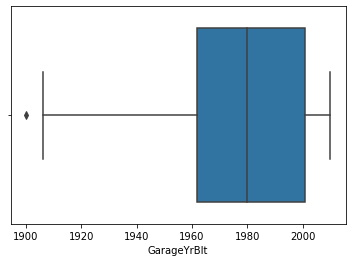

In [907]:
sns.boxplot(x=data['GarageYrBlt'])



In [908]:
iqr = stats.iqr(data.GarageYrBlt)
iqr

39.0

In [909]:
Q1 = data.GarageYrBlt.quantile(0.25)
Q1

1962.0

In [910]:
Q3=data.GarageYrBlt.quantile(0.75)
Q3

2001.0

In [911]:
upper_bond_GarageYrBlt = Q3+1.5*iqr
upper_bond_GarageYrBlt

2059.5

In [912]:
lower_bond_GarageYrBlt = Q1-1.5*iqr
lower_bond_GarageYrBlt


1903.5

In [913]:
data.GarageYrBlt = np.where(data.GarageYrBlt>upper_bond_GarageYrBlt,upper_bond_GarageYrBlt,data.GarageYrBlt)

In [914]:
dt=data[data['GarageYrBlt']>2059.5]
dt

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [915]:
data.GarageYrBlt= np.where(data.GarageYrBlt<lower_bond_GarageYrBlt,lower_bond_GarageYrBlt,data.GarageYrBlt)

In [916]:
dt=data[data['GarageYrBlt']<1903.5]
dt

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


<AxesSubplot:xlabel='GarageYrBlt'>

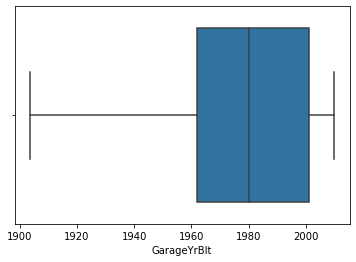

In [917]:
sns.boxplot(x=data['GarageYrBlt'])

<AxesSubplot:xlabel='GarageYrBlt'>

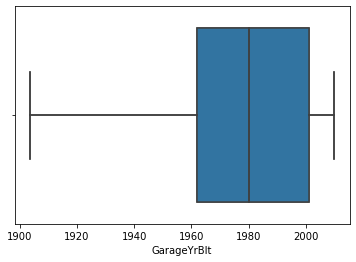

In [918]:
# GarageYrBlt

data.GarageYrBlt.value_counts()

data.GarageYrBlt.isnull().sum()

data.GarageYrBlt.median()

data.GarageYrBlt.fillna(1980.0,inplace=True)
data

data.GarageYrBlt.isnull().sum()

sns.boxplot(x=data['GarageYrBlt'])



iqr = stats.iqr(data.GarageYrBlt)
iqr

Q1 = data.GarageYrBlt.quantile(0.25)
Q1

Q3=data.GarageYrBlt.quantile(0.75)
Q3

upper_bond_GarageYrBlt = Q3+1.5*iqr
upper_bond_GarageYrBlt

lower_bond_GarageYrBlt = Q1-1.5*iqr
lower_bond_GarageYrBlt


data.GarageYrBlt = np.where(data.GarageYrBlt>upper_bond_GarageYrBlt,upper_bond_GarageYrBlt,data.GarageYrBlt)

dt=data[data['GarageYrBlt']>2059.5]
dt

data.GarageYrBlt= np.where(data.GarageYrBlt<lower_bond_GarageYrBlt,lower_bond_GarageYrBlt,data.GarageYrBlt)

dt=data[data['GarageYrBlt']<1903.5]
dt

sns.boxplot(x=data['GarageYrBlt'])

# # GarageFinish

In [919]:
data.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [920]:

data.GarageFinish.isnull().sum()


81

In [921]:

data.GarageFinish.mode()

0    Unf
Name: GarageFinish, dtype: object

In [922]:
data.GarageFinish.fillna('Unf',inplace=True)
data

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450.0,IR3,Lvl,Corner,Blmngtn,Norm,1Fam,2Story,7,1,2003.0,2003,Flat,ClyTile,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710.0,1,0,1,3,1,Gd,7,Typ,0,2Types,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,40,RL,80.0,9600.0,IR3,Lvl,Corner,Blmngtn,Artery,1Fam,1Story,6,1,1976.0,1976,Flat,ClyTile,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262.0,0,0,0,3,1,TA,6,Typ,1,2Types,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250.0,IR1,Lvl,Corner,Blmngtn,Norm,1Fam,2Story,7,1,2001.0,2002,Flat,ClyTile,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786.0,1,0,1,3,1,Gd,6,Typ,1,2Types,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,50,RL,60.0,9550.0,IR1,Lvl,Corner,Blmngtn,Norm,1Fam,2Story,7,1,1915.0,1970,Flat,ClyTile,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717.0,1,0,0,3,1,Gd,7,Typ,1,2Types,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260.0,IR1,Lvl,Corner,StoneBr,Norm,1Fam,2Story,8,1,2000.0,2000,Flat,ClyTile,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198.0,1,0,1,4,1,Gd,10,Typ,1,2Types,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917.0,IR3,Lvl,Corner,Blmngtn,Norm,1Fam,2Story,6,1,1999.0,2000,Flat,ClyTile,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647.0,0,0,1,3,1,TA,7,Typ,1,2Types,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000.0
1456,40,RL,85.0,13175.0,IR3,Lvl,Corner,Blmngtn,Norm,1Fam,1Story,6,1,1978.0,1988,Flat,ClyTile,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073.0,1,0,0,3,1,TA,7,Maj1,2,2Types,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000.0
1457,50,RL,66.0,9042.0,IR3,Lvl,Corner,Blmngtn,Norm,1Fam,2Story,7,1,1941.0,2006,Flat,ClyTile,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340.0,0,0,0,4,1,Gd,10,Typ,2,2Types,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500.0
1458,40,RL,68.0,9717.0,IR3,Lvl,Corner,Blmngtn,Norm,1Fam,1Story,1,1,1950.0,1996,Hip,ClyTile,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078.0,1,0,0,0,1,Gd,5,Typ,0,2Types,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125.0


In [923]:
data.GarageFinish.isnull().sum()

0

In [924]:
model=ols('SalePrice~GarageFinish',data=data).fit()
anova=sm.stats.anova_lm(model)
anova.round(decimals=4)


,df,sum_sq,mean_sq,F,PR(>F)
GarageFinish,2.0,2.233256e+12,1.116628e+12,373.4482,0.0
Residual,1457.0,4.356499e+12,2.990048e+09,NaN,NaN


In [925]:

tukey = pairwise_tukeyhsd(data['SalePrice'],data['GarageFinish'],alpha=0.05)
print(tukey)



     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj    lower       upper    reject
--------------------------------------------------------------
   Fin    RFn -28706.7544   0.0 -37967.1388   -19446.37   True
   Fin    Unf -91189.1399   0.0 -99600.2124 -82778.0674   True
   RFn    Unf -62482.3855   0.0 -70419.0439 -54545.7271   True
--------------------------------------------------------------


# # GarageCars


In [926]:
data.GarageCars.value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

In [927]:

data.GarageCars.isnull().sum()

0

In [928]:
model=ols('SalePrice~GarageCars',data=data).fit()
anova=sm.stats.anova_lm(model)
anova.round(decimals=4)


,df,sum_sq,mean_sq,F,PR(>F)
GarageCars,1.0,2.978423e+12,2.978423e+12,1202.4759,0.0
Residual,1458.0,3.611332e+12,2.476908e+09,NaN,NaN


In [929]:
tukey = pairwise_tukeyhsd(data['SalePrice'],data['GarageCars'],alpha=0.05)
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------
     0      1  24799.4044 0.0002    9001.6545  40597.1543   True
     0      2   80226.886   -0.0   65234.7731  95218.9988   True
     0      3 178763.3542   -0.0  161552.0604  195974.648   True
     0      4   89338.516 0.0004   30009.6042 148667.4279   True
     1      2  55427.4816   -0.0   47362.7837  63492.1794   True
     1      3 153963.9498   -0.0  142280.4342 165647.4654   True
     1      4  64539.1117 0.0203    6571.9167 122506.3066   True
     2      3  98536.4682   -0.0   87967.6895  109105.247   True
     2      4   9111.6301 0.9928  -48641.2074  66864.4676  False
     3      4 -89424.8381 0.0003 -147793.1122  -31056.564   True
----------------------------------------------------------------


In [930]:

data.GarageCars=data.GarageCars.replace({4:1,4:2})

tukey = pairwise_tukeyhsd(data['SalePrice'],data['GarageCars'],alpha=0.05)
print(tukey)


      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
     0      1  24799.4044 0.0001   9926.6524  39672.1564   True
     0      2  80281.8415    0.0  66171.3646  94392.3184   True
     0      3 178763.3542    0.0 162559.8248 194966.8835   True
     1      2  55482.4371    0.0  47897.0328  63067.8414   True
     1      3 153963.9498    0.0 142964.5333 164963.3662   True
     2      3  98481.5127    0.0   88536.968 108426.0574   True
---------------------------------------------------------------


# # GarageArea



In [931]:
data.GarageArea.value_counts()

0      81
440    49
576    47
240    38
484    34
       ..
320     1
594     1
831     1
878     1
192     1
Name: GarageArea, Length: 441, dtype: int64

In [932]:
data.GarageArea.isnull().sum()

0

<AxesSubplot:xlabel='GarageArea'>

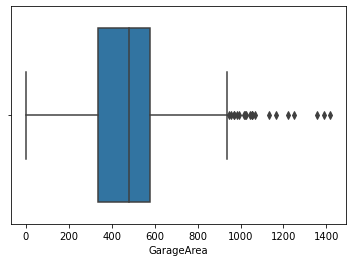

In [933]:
sns.boxplot(x=data['GarageArea'])

In [934]:
iqr = stats.iqr(data.GarageArea)
iqr



241.5

In [935]:
Q1 = data.GarageArea.quantile(0.25)
Q1


334.5

In [936]:

Q3=data.GarageArea.quantile(0.75)
Q3

576.0

In [937]:

upper_bond_GarageArea = Q3+1.5*iqr
upper_bond_GarageArea

938.25

In [938]:
lower_bond_GarageArea = Q1-1.5*iqr
lower_bond_GarageArea


-27.75

In [939]:
data.GarageArea = np.where(data.GarageArea>upper_bond_GarageArea,upper_bond_GarageArea,data.GarageArea)

In [940]:
dt=data[data['GarageArea']>938.25]
dt

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [941]:
data.GarageArea= np.where(data.GarageArea<lower_bond_GarageArea,lower_bond_GarageArea,data.GarageArea)

In [942]:

dt=data[data['GarageArea']<-27.75]
dt


,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


<AxesSubplot:xlabel='GarageArea'>

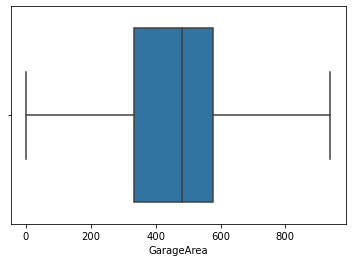

In [943]:
sns.boxplot(x=data['GarageArea'])

# Garage qual

In [944]:
data.GarageQual.isnull().sum()

81

In [945]:
data['GarageQual'].value_counts().shape

(5,)

In [946]:
data.GarageQual.mode()

0    TA
Name: GarageQual, dtype: object

In [947]:
data.GarageQual.fillna('TA',inplace=True)
data

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450.0,IR3,Lvl,Corner,Blmngtn,Norm,1Fam,2Story,7,1,2003.0,2003,Flat,ClyTile,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710.0,1,0,1,3,1,Gd,7,Typ,0,2Types,2003.0,RFn,2,548.0,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,40,RL,80.0,9600.0,IR3,Lvl,Corner,Blmngtn,Artery,1Fam,1Story,6,1,1976.0,1976,Flat,ClyTile,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262.0,0,0,0,3,1,TA,6,Typ,1,2Types,1976.0,RFn,2,460.0,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250.0,IR1,Lvl,Corner,Blmngtn,Norm,1Fam,2Story,7,1,2001.0,2002,Flat,ClyTile,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786.0,1,0,1,3,1,Gd,6,Typ,1,2Types,2001.0,RFn,2,608.0,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,50,RL,60.0,9550.0,IR1,Lvl,Corner,Blmngtn,Norm,1Fam,2Story,7,1,1915.0,1970,Flat,ClyTile,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717.0,1,0,0,3,1,Gd,7,Typ,1,2Types,1998.0,Unf,3,642.0,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260.0,IR1,Lvl,Corner,StoneBr,Norm,1Fam,2Story,8,1,2000.0,2000,Flat,ClyTile,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198.0,1,0,1,4,1,Gd,10,Typ,1,2Types,2000.0,RFn,3,836.0,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917.0,IR3,Lvl,Corner,Blmngtn,Norm,1Fam,2Story,6,1,1999.0,2000,Flat,ClyTile,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647.0,0,0,1,3,1,TA,7,Typ,1,2Types,1999.0,RFn,2,460.0,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000.0
1456,40,RL,85.0,13175.0,IR3,Lvl,Corner,Blmngtn,Norm,1Fam,1Story,6,1,1978.0,1988,Flat,ClyTile,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073.0,1,0,0,3,1,TA,7,Maj1,2,2Types,1978.0,Unf,2,500.0,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000.0
1457,50,RL,66.0,9042.0,IR3,Lvl,Corner,Blmngtn,Norm,1Fam,2Story,7,1,1941.0,2006,Flat,ClyTile,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340.0,0,0,0,4,1,Gd,10,Typ,2,2Types,1941.0,RFn,1,252.0,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500.0
1458,40,RL,68.0,9717.0,IR3,Lvl,Corner,Blmngtn,Norm,1Fam,1Story,1,1,1950.0,1996,Hip,ClyTile,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078.0,1,0,0,0,1,Gd,5,Typ,0,2Types,1950.0,Unf,1,240.0,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125.0


In [948]:
data.GarageQual.isnull().sum()

0

In [949]:
model=ols('SalePrice~GarageQual',data=data).fit()
anova=sm.stats.anova_lm(model)
anova.round(decimals=4)


,df,sum_sq,mean_sq,F,PR(>F)
GarageQual,4.0,1.819395e+11,4.548487e+10,10.3281,0.0
Residual,1455.0,6.407815e+12,4.403997e+09,NaN,NaN


In [950]:
tukey = pairwise_tukeyhsd(data['SalePrice'],data['GarageQual'],alpha=0.05)
print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj     lower        upper    reject
-----------------------------------------------------------------
    Ex     Fa  -72439.1458 0.3542 -180304.2189  35425.9273  False
    Ex     Gd   19848.2143   0.99  -95464.3993 135160.8279  False
    Ex     Po  -95845.8333 0.3923 -243835.4927  52143.8261  False
    Ex     TA  -17088.7069 0.9918 -121845.9014  87668.4876  False
    Fa     Gd   92287.3601    0.0   37233.4451 147341.2752   True
    Fa     Po  -23406.6875 0.9762 -131271.7606  84458.3856  False
    Fa     TA   55350.4389    0.0   28742.0849  81958.7929   True
    Gd     Po -115694.0476 0.0488 -231006.6612    -381.434   True
    Gd     TA  -36936.9212 0.2327  -85620.8955  11747.0532  False
    Po     TA   78757.1264 0.2413   -26000.068 183514.3209  False
-----------------------------------------------------------------


In [951]:
data.GarageQual.replace({'Gd':'Ex','Po':'Ex','TA':'Ex'}, inplace=True)

In [952]:
tukey = pairwise_tukeyhsd(data['SalePrice'],data['GarageQual'],alpha=0.05)
print(tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj    lower       upper    reject
--------------------------------------------------------------
    Ex     Fa -55585.6455   0.0 -74729.2833 -36442.0076   True
--------------------------------------------------------------


# Siddiq
# TotalBsmtSF

In [953]:
data.TotalBsmtSF.value_counts()

0       37
864     35
672     17
912     15
1040    14
        ..
1838     1
1581     1
707      1
611      1
1542     1
Name: TotalBsmtSF, Length: 721, dtype: int64

In [954]:
data.TotalBsmtSF.value_counts().shape

(721,)

In [955]:
data.TotalBsmtSF.isnull().sum()

0

C:\Users\T Yashwanth Kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalBsmtSF'>

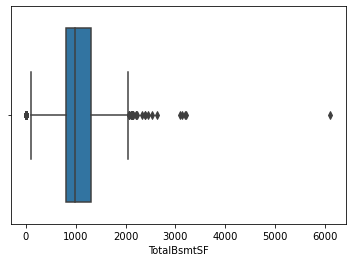

In [956]:
sns.boxplot(data.TotalBsmtSF)

In [957]:
q3 = data.TotalBsmtSF.quantile(0.75)
q1 = data.TotalBsmtSF.quantile(0.25)

In [958]:
iqr = stats.iqr(data.TotalBsmtSF)

In [959]:
upper = q3+(1.5*iqr)
lower = q1-(1.5*iqr)

In [960]:
data.TotalBsmtSF = np.where(data.TotalBsmtSF>upper,upper,data.TotalBsmtSF)
data.TotalBsmtSF = np.where(data.TotalBsmtSF<lower,lower,data.TotalBsmtSF)

C:\Users\T Yashwanth Kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalBsmtSF'>

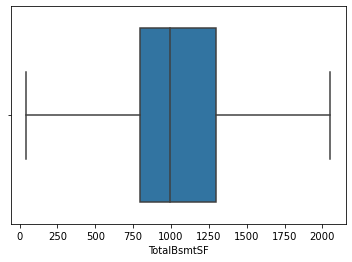

In [961]:
sns.boxplot(data.TotalBsmtSF)

# BsmtFinSF1

In [962]:
data.BsmtFinSF1.value_counts()

0       467
24       12
16        9
686       5
662       5
       ... 
1338      1
1324      1
1460      1
328       1
830       1
Name: BsmtFinSF1, Length: 637, dtype: int64

In [963]:
data.BsmtFinSF1.isnull().sum()

0

<AxesSubplot:>

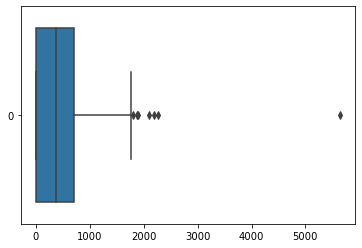

In [964]:
sns.boxplot(data=data.BsmtFinSF1,orient='h')

In [965]:
iqr=stats.iqr(data.BsmtFinSF1)
iqr

712.25

In [966]:
q3=data.BsmtFinSF1.quantile(0.75)
q3

712.25

In [967]:
upper_bond_BsmtFinSF1=q3+(1.5*iqr)
upper_bond_BsmtFinSF1

1780.625

In [968]:
data.BsmtFinSF1=np.where(data.BsmtFinSF1>upper_bond_BsmtFinSF1,upper_bond_BsmtFinSF1,data.BsmtFinSF1)

<AxesSubplot:>

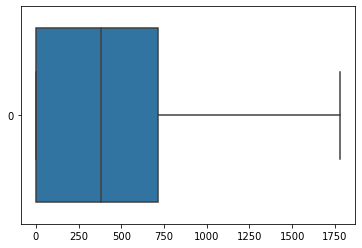

In [969]:
sns.boxplot(data=data.BsmtFinSF1,orient='h')

# BsmtFinType2

In [970]:
data.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [971]:
data.BsmtFinType2.isnull().sum()

38

In [972]:
data.BsmtFinType2.isnull().sum()

38

In [973]:
data['BsmtFinType2'].mode()#for continous median

0    Unf
Name: BsmtFinType2, dtype: object

In [974]:
data.BsmtFinType2.fillna('Unf',inplace=True)

In [975]:
model = ols("SalePrice ~ BsmtFinType2",data = data).fit()
result = sm.stats.anova_lm(model,type=2)
print(result.round(decimals=4))

                  df        sum_sq       mean_sq       F  PR(>F)
BsmtFinType2     5.0  5.257842e+10  1.051568e+10  2.3389  0.0398
Residual      1454.0  6.537177e+12  4.495995e+09     NaN     NaN


In [976]:
from  statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey4= pairwise_tukeyhsd( data['SalePrice'],data['BsmtFinType2'],alpha=0.05)
print(tukey4)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
   ALQ    BLQ -47527.2895 0.1365 -102628.5169   7573.938  False
   ALQ    GLQ -17646.1466 0.9759  -85038.3295 49746.0363  False
   ALQ    LwQ  -34264.159 0.4188  -86442.9887 17914.6706  False
   ALQ    Rec -35506.0673 0.3513  -86542.5952 15530.4607  False
   ALQ    Unf -19926.0808 0.7929  -64142.3196 24290.1579  False
   BLQ    GLQ  29881.1429 0.7288  -31145.7577 90908.0434  False
   BLQ    LwQ  13263.1304 0.9542  -30385.5413 56911.8021  False
   BLQ    Rec  12021.2222 0.9655  -30255.2897 54297.7342  False
   BLQ    Unf  27601.2087 0.1807   -6127.8892 61330.3065  False
   GLQ    LwQ -16618.0124 0.9654  -75019.7897 41783.7648  False
   GLQ    Rec -17859.9206 0.9494   -75243.407 39523.5657  False
   GLQ    Unf  -2279.9342    1.0  -53692.1223 49132.2539  False
   LwQ    Rec  -1241.9082    1.0  -39631

In [977]:
data.drop(columns = "BsmtFinType2",axis=1,inplace=True)

In [978]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'Y

# BsmtFinSF2

In [979]:
data.BsmtFinSF2.value_counts()

0       1293
180        5
374        3
551        2
147        2
        ... 
532        1
165        1
1120       1
311        1
1029       1
Name: BsmtFinSF2, Length: 144, dtype: int64

In [980]:
data.BsmtFinSF2.isnull().sum()

0

<AxesSubplot:>

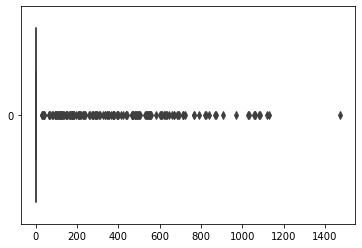

In [981]:
sns.boxplot(data=data.BsmtFinSF2,orient='h')

In [982]:
data.drop(columns = "BsmtFinSF2",axis=1,inplace=True)

In [983]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
 

# BsmtUnfSF

In [984]:
data.BsmtUnfSF.value_counts()

0       118
728       9
384       8
600       7
300       7
       ... 
551       1
1257      1
605       1
467       1
136       1
Name: BsmtUnfSF, Length: 780, dtype: int64

In [985]:
data.BsmtUnfSF.isnull().sum()

0

<AxesSubplot:>

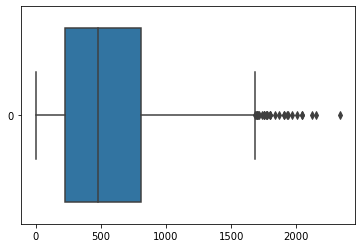

In [986]:
sns.boxplot(data=data.BsmtUnfSF,orient='h')

In [987]:
iqr=stats.iqr(data.BsmtUnfSF)
iqr

585.0

In [988]:
q3=data.BsmtUnfSF.quantile(0.75)
q3

808.0

In [989]:
upper_bond_BsmtUnfSF=q3+(1.5*iqr)
upper_bond_BsmtUnfSF

1685.5

In [990]:
data.BsmtUnfSF=np.where(data.BsmtUnfSF>upper_bond_BsmtUnfSF,upper_bond_BsmtUnfSF,data.BsmtUnfSF)

<AxesSubplot:>

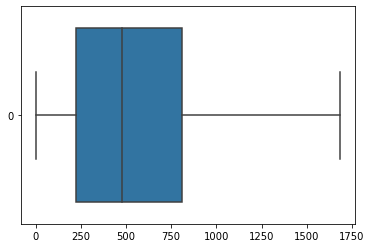

In [991]:
sns.boxplot(data=data.BsmtUnfSF,orient='h')

# Heating

In [992]:
data.Heating.value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [993]:
data.Heating.isnull().sum()

0

In [994]:
model = ols("SalePrice ~ Heating",data = data).fit()
result = sm.stats.anova_lm(model,type=2)
print(result.round(decimals=4))

              df        sum_sq       mean_sq       F  PR(>F)
Heating      5.0  1.227156e+11  2.454313e+10  5.5181     0.0
Residual  1454.0  6.467039e+12  4.447757e+09     NaN     NaN


In [995]:
from  statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey4= pairwise_tukeyhsd( data['SalePrice'],data['Heating'],alpha=0.05)
print(tukey4)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj     lower        upper    reject
-----------------------------------------------------------------
 Floor   GasA  105875.5686 0.6073  -84496.4113 296247.5485  False
 Floor   GasW   92189.8056 0.7595 -103330.3634 287709.9745  False
 Floor   Grav    2771.4286    1.0 -200673.5567 206216.4139  False
 Floor   OthW      53250.0 0.9869 -179825.5112 286325.5112  False
 Floor   Wall      19600.0 0.9998 -193167.8585 232367.8585  False
  GasA   GasW  -13685.7631 0.9547  -58822.9829  31451.4568  False
  GasA   Grav -103104.1401 0.0007 -175208.8846 -30999.3955   True
  GasA   OthW  -52625.5686 0.8752 -187285.9788  82034.8416  False
  GasA   Wall  -86275.5686 0.1019 -181561.4215   9010.2842  False
  GasW   Grav   -89418.377 0.0318 -174187.1209  -4649.6331   True
  GasW   OthW  -38939.8056 0.9704 -180785.0446 102905.4335  False
  GasW   Wall  -72589.8056 0.3607 -177785.0502  32605.4391  False
  Grav   O

In [996]:
data['Heating'].replace({'GasA':'Floor','GasW':'Floor','Grav':'Floor','OthW':'Floor','Wall':'Floor','GasW':'GasA','OthW':'GasA','Wall':'GasA','Grav':'GasW','OthW':'GasW','Wall':'GasW','OthW':'Grav','Wall':'Grav','Wall':'OthW'},inplace=True)

In [997]:
from  statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey4= pairwise_tukeyhsd( data['SalePrice'],data['Heating'],alpha=0.05)
print(tukey4)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj     lower        upper    reject
-----------------------------------------------------------------
 Floor   GasA  -13611.6724 0.9113  -56836.4188   29613.074  False
 Floor   GasW -103030.0494 0.0005 -172079.8837  -33980.215   True
 Floor   Grav   -52551.478 0.7997  -181506.797  76403.8411  False
 Floor   OthW   -86201.478 0.0746 -177450.3576   5047.4016  False
  GasA   GasW   -89418.377 0.0224  -170595.805  -8240.9489   True
  GasA   Grav  -38939.8056 0.9356 -174775.6237  96896.0126  False
  GasA   OthW  -72589.8056 0.2822 -173328.3445  28148.7334  False
  GasW   Grav   50478.5714 0.8798   -95640.799 196597.9419  False
  GasW   OthW   16828.5714 0.9945  -97398.1949 131055.3378  False
  Grav   OthW     -33650.0 0.9777 -191476.9585 124176.9585  False
-----------------------------------------------------------------


In [998]:
data['Heating'].replace({'GasA':'Floor','Grav':'Floor','OthW':'Floor','GasW':'GasA','Grav':'GasA','OthW':'GasA','Grav':'GasW','OthW':'GasW','OthW':'Grav'},inplace=True)

In [999]:
from  statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey4= pairwise_tukeyhsd( data['SalePrice'],data['Heating'],alpha=0.05)
print(tukey4)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj     lower        upper    reject
-----------------------------------------------------------------
 Floor   GasA -102860.7266 0.0003 -167877.9224 -37843.5307   True
 Floor   GasW  -52382.1551 0.6837 -173808.8702  69044.5599  False
 Floor   Grav  -86032.1551 0.0496 -171953.0442   -111.2661   True
  GasA   GasW   50478.5714 0.7813  -87111.3282  188068.471  False
  GasA   Grav   16828.5714  0.978  -90730.4008 124387.5437  False
  GasW   Grav     -33650.0 0.9374  -182264.077  114964.077  False
-----------------------------------------------------------------


In [1000]:
data['Heating'].replace({'GasW':'Floor','Grav':'Floor','GasW':'GasA','Grav':'GasA','Grav':'GasW'},inplace=True)

In [1001]:
from  statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey4= pairwise_tukeyhsd( data['SalePrice'],data['Heating'],alpha=0.05)
print(tukey4)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------
 Floor   GasA -91643.2663 0.0001 -143980.9027 -39305.6298   True
 Floor   GasW -86032.1551 0.0273 -164403.6958  -7660.6145   True
  GasA   GasW   5611.1111 0.9893  -88449.8398   99672.062  False
----------------------------------------------------------------


In [1002]:
data['Heating'].replace({'GasW':'GasA'},inplace=True)

In [1003]:
from  statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey4= pairwise_tukeyhsd( data['SalePrice'],data['Heating'],alpha=0.05)
print(tukey4)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj    lower        upper    reject
---------------------------------------------------------------
 Floor   GasA -89916.7705   0.0 -126364.8866 -53468.6544   True
---------------------------------------------------------------


# HeatingQC

In [1004]:
data.HeatingQC.value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [1005]:
data.HeatingQC.isnull().sum()

0

In [1006]:
model = ols("SalePrice ~ HeatingQC",data = data).fit()
result = sm.stats.anova_lm(model,type=2)
print(result.round(decimals=4))

               df        sum_sq       mean_sq         F  PR(>F)
HeatingQC     4.0  1.479951e+12  3.699877e+11  105.3528     0.0
Residual   1455.0  5.109804e+12  3.511893e+09       NaN     NaN


In [1007]:
from  statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey4= pairwise_tukeyhsd( data['SalePrice'],data['HeatingQC'],alpha=0.05)
print(tukey4)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj     lower        upper    reject
-----------------------------------------------------------------
    Ex     Fa   -84136.633   -0.0 -108010.9268 -60262.3392   True
    Ex     Gd  -51632.4693   -0.0  -63634.7077 -39630.2308   True
    Ex     Po -121056.1228 0.2468 -283019.5587  40907.3131  False
    Ex     TA  -65819.4733   -0.0  -75646.0081 -55992.9384   True
    Fa     Gd   32504.1637 0.0044    7140.2323  57868.0952   True
    Fa     Po  -36919.4898 0.9725 -200416.9817 126578.0021  False
    Fa     TA   18317.1597  0.243    -6092.594  42726.9135  False
    Gd     Po  -69423.6535 0.7691 -231613.3624  92766.0554  False
    Gd     TA   -14187.004  0.025  -27221.8764  -1152.1315   True
    Po     TA   55236.6495 0.8849 -106806.5815 217279.8806  False
-----------------------------------------------------------------


In [1008]:
data['HeatingQC'].replace({'Po':'Ex','Po':'Fa','TA':'Fa','Po':'Gd','TA':'Gd','Po':'TA'},inplace=True)

In [1009]:
from  statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey4= pairwise_tukeyhsd( data['SalePrice'],data['HeatingQC'],alpha=0.05)
print(tukey4)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj     lower        upper    reject
-----------------------------------------------------------------
    Ex     Fa   -84136.633    0.0 -106679.7362 -61593.5298   True
    Ex     Gd  -60708.7588    0.0  -68859.4548 -52558.0629   True
    Ex     TA -121056.1228 0.1753 -273988.7491  31876.5035  False
    Fa     Gd   23427.8742  0.039     809.6543   46046.094   True
    Fa     TA  -36919.4898 0.9273 -191300.6357 117461.6561  False
    Gd     TA   -60347.364 0.7408 -213291.0809  92596.3529  False
-----------------------------------------------------------------


In [1010]:
data['HeatingQC'].replace({'TA':'Ex','Gd':'Fa','TA':'Fa','Gd':'TA'},inplace=True)

In [1011]:
from  statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey4= pairwise_tukeyhsd( data['SalePrice'],data['HeatingQC'],alpha=0.05)
print(tukey4)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------
    Ex     Fa -84875.0228    0.0 -105240.0371 -64510.0085   True
    Ex     TA -60708.7588    0.0  -68141.9958 -53275.5219   True
    Fa     TA   24166.264 0.0154    3732.0956  44600.4324   True
----------------------------------------------------------------


# CentralAir

In [1012]:
data.CentralAir.value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [1013]:
data.CentralAir.isnull().sum()

0

In [1014]:
model = ols("SalePrice ~ CentralAir",data = data).fit()
result = sm.stats.anova_lm(model,type=2)
print(result.round(decimals=4))

                df        sum_sq       mean_sq         F  PR(>F)
CentralAir     1.0  5.277426e+11  5.277426e+11  126.9296     0.0
Residual    1458.0  6.062012e+12  4.157759e+09       NaN     NaN


In [1015]:
from  statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey4= pairwise_tukeyhsd( data['SalePrice'],data['CentralAir'],alpha=0.05)
print(tukey4)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper   reject
----------------------------------------------------------
     N      Y 77083.1362   0.0 63662.0794 90504.193   True
----------------------------------------------------------


# Electrical

In [1016]:
data.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [1017]:
data.Electrical.isnull().sum()

1

In [1018]:
data.Electrical.mode()

0    SBrkr
Name: Electrical, dtype: object

In [1019]:
data.Electrical.fillna('SBrkr',inplace=True)

In [1020]:
data.Electrical.isnull().sum()

0

In [1021]:
model = ols("SalePrice ~ Electrical",data = data).fit()
result = sm.stats.anova_lm(model,type=2)
print(result.round(decimals=4))

                df        sum_sq       mean_sq        F  PR(>F)
Electrical     4.0  4.892899e+11  1.223225e+11  29.1747     0.0
Residual    1455.0  6.100465e+12  4.192760e+09      NaN     NaN


In [1022]:
from  statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey4= pairwise_tukeyhsd( data['SalePrice'],data['Electrical'],alpha=0.05)
print(tukey4)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------
 FuseA  FuseF -14521.4492 0.8429  -53135.9434  24093.0451  False
 FuseA  FuseP -24863.5603 0.9658 -128584.1048  78856.9842  False
 FuseA    Mix -55196.8936 0.9155 -232984.4459 122590.6587  False
 FuseA  SBrkr  60687.9629   -0.0   41816.0889   79559.837   True
 FuseF  FuseP -10342.1111  0.999 -117969.1998  97284.9776  False
 FuseF    Mix -40675.4444 0.9724 -220770.0102 139419.1214  False
 FuseF  SBrkr  75209.4121    0.0   40832.2902  109586.534   True
 FuseP    Mix -30333.3333 0.9943 -234541.3763 173874.7096  False
 FuseP  SBrkr  85551.5232   0.15  -16667.1575 187770.2039  False
   Mix  SBrkr 115884.8566 0.3803  -61030.7196 292800.4327  False
----------------------------------------------------------------


In [1023]:
data['Electrical'].replace({'FuseF':'FuseA','FuseP':'FuseA','Mix':'FuseA','FuseP':'FuseF','Mix':'FuseF','Mix':'FuseP','SBrkr':'FuseP','SBrkr':'Mix'},inplace=True)

In [1024]:
from  statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey4= pairwise_tukeyhsd( data['SalePrice'],data['Electrical'],alpha=0.05)
print(tukey4)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------
 FuseA  FuseF -21623.2369 0.9406 -118962.2148   75715.741  False
 FuseA  FuseP -51956.5702 0.8549 -219187.4528 115274.3123  False
 FuseA    Mix  63928.2863    0.0   48116.6571  79739.9155   True
 FuseF  FuseP -30333.3333 0.9774  -222641.895 161975.2284  False
 FuseF    Mix  85551.5232 0.1018  -10710.7355  181813.782  False
 FuseP    Mix 115884.8566  0.279  -50721.6076 282491.3207  False
----------------------------------------------------------------


In [1025]:
data.Electrical.replace({'FuseF':'FuseA','FuseP':'FuseA'},inplace=True)

In [1026]:
from  statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey4= pairwise_tukeyhsd( data['SalePrice'],data['Electrical'],alpha=0.05)
print(tukey4)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper   reject
----------------------------------------------------------
 FuseA    Mix 64862.8966   0.0 52986.3101 76739.483   True
----------------------------------------------------------


# 1stFlrSF

In [1027]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450.0,IR3,Lvl,Corner,Blmngtn,Norm,1Fam,2Story,7,1,2003.0,2003,Flat,ClyTile,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,150.0,856.0,Floor,Ex,Y,Mix,856,854,0,1710.0,1,0,1,3,1,Gd,7,Typ,0,2Types,2003.0,RFn,2,548.0,Ex,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,40,RL,80.0,9600.0,IR3,Lvl,Corner,Blmngtn,Artery,1Fam,1Story,6,1,1976.0,1976,Flat,ClyTile,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,284.0,1262.0,Floor,Ex,Y,Mix,1262,0,0,1262.0,0,0,0,3,1,TA,6,Typ,1,2Types,1976.0,RFn,2,460.0,Ex,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250.0,IR1,Lvl,Corner,Blmngtn,Norm,1Fam,2Story,7,1,2001.0,2002,Flat,ClyTile,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,434.0,920.0,Floor,Ex,Y,Mix,920,866,0,1786.0,1,0,1,3,1,Gd,6,Typ,1,2Types,2001.0,RFn,2,608.0,Ex,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,50,RL,60.0,9550.0,IR1,Lvl,Corner,Blmngtn,Norm,1Fam,2Story,7,1,1915.0,1970,Flat,ClyTile,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,540.0,756.0,Floor,TA,Y,Mix,961,756,0,1717.0,1,0,0,3,1,Gd,7,Typ,1,2Types,1998.0,Unf,3,642.0,Ex,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260.0,IR1,Lvl,Corner,StoneBr,Norm,1Fam,2Story,8,1,2000.0,2000,Flat,ClyTile,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,490.0,1145.0,Floor,Ex,Y,Mix,1145,1053,0,2198.0,1,0,1,4,1,Gd,10,Typ,1,2Types,2000.0,RFn,3,836.0,Ex,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000.0


In [1028]:
data["1stFlrSF"].isnull().sum()

0

C:\Users\T Yashwanth Kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='1stFlrSF'>

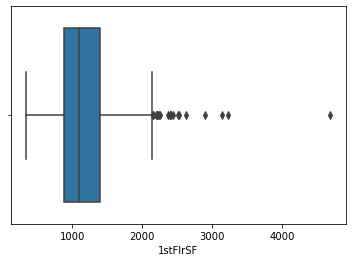

In [1029]:
sns.boxplot(data["1stFlrSF"], orient="h")

In [1030]:
iqr=stats.iqr(data['1stFlrSF'])
iqr

509.25

In [1031]:
q3=data['1stFlrSF'].quantile(0.75)
q3

1391.25

In [1032]:
upper_bond_1stFlrSF=q3+(1.5*iqr)
upper_bond_1stFlrSF

2155.125

In [1033]:
data['1stFlrSF']=np.where(data['1stFlrSF']>upper_bond_1stFlrSF,upper_bond_1stFlrSF,data['1stFlrSF'])

<AxesSubplot:>

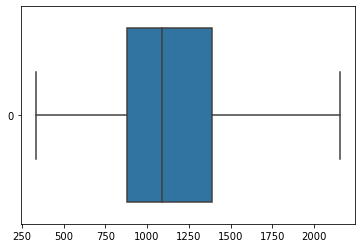

In [1034]:
sns.boxplot(data=data['1stFlrSF'],orient='h')

# 2ndFlrSF

In [1035]:
 data['2ndFlrSF'].value_counts()

0       829
728      10
504       9
546       8
672       8
       ... 
1538      1
914       1
1067      1
1000      1
1152      1
Name: 2ndFlrSF, Length: 417, dtype: int64

C:\Users\T Yashwanth Kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='2ndFlrSF'>

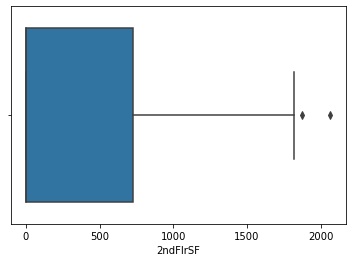

In [1036]:
sns.boxplot(data["2ndFlrSF"], orient="h")

In [1037]:
iqr=stats.iqr(data['2ndFlrSF'])
iqr

728.0

In [1038]:
q3=data['2ndFlrSF'].quantile(0.75)
q3

728.0

In [1039]:
upper_bond_2ndFlrSF=q3+(1.5*iqr)
upper_bond_2ndFlrSF

1820.0

In [1040]:
data['2ndFlrSF']=np.where(data['2ndFlrSF']>upper_bond_2ndFlrSF,upper_bond_2ndFlrSF,data['2ndFlrSF'])

<AxesSubplot:>

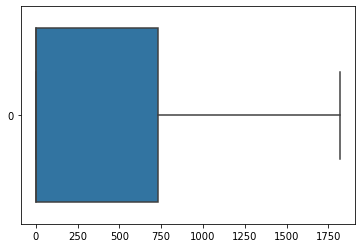

In [1041]:
sns.boxplot(data=data['2ndFlrSF'],orient='h')

# Abhishek
# Exterior1st


In [1042]:
data['Exterior1st'].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

In [1043]:
data['Exterior1st'].value_counts().shape

(15,)

In [1044]:
data.Exterior1st.isnull().sum()

0

In [1045]:
data['Exterior1st'].unique()

array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock'], dtype=object)

In [1046]:
data['Exterior1st'] == 'VinylSd'

0        True
1       False
2        True
3       False
4        True
        ...  
1455     True
1456    False
1457    False
1458    False
1459    False
Name: Exterior1st, Length: 1460, dtype: bool

In [1047]:
f_oneway(data['Exterior1st'] =='VinylSd',
         data['Exterior1st'] =='MetalSd', 
         data['Exterior1st'] =='Wd Sdng', 
         data['Exterior1st'] =='HdBoard',        
         data['Exterior1st'] =='BrkFace',
         data['Exterior1st'] =='WdShing',
         data['Exterior1st'] =='CemntBd',
         data['Exterior1st'] =='Plywood',
         data['Exterior1st'] =='AsbShng',
         data['Exterior1st'] =='Stucco', 
         data['Exterior1st'] =='BrkComm', 
         data['Exterior1st'] =='AsphShn',
         data['Exterior1st'] =='Stone',
         data['Exterior1st'] =='ImStucc',
         data['Exterior1st'] =='CBlock')

F_onewayResult(statistic=259.0631711634249, pvalue=0.0)

In [1048]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(data.SalePrice,data.Exterior1st,alpha=0.05)
print(tukey)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
 group1  group2   meandiff   p-adj     lower        upper    reject
-------------------------------------------------------------------
AsbShng AsphShn     -7385.55    1.0 -219674.5757 204903.4757  False
AsbShng BrkComm    -36385.55    1.0 -190029.0667 117257.9667  False
AsbShng BrkFace      84307.7    0.0   29494.9092 139120.4908   True
AsbShng  CBlock     -2385.55    1.0 -214674.5757 209903.4757  False
AsbShng CemntBd  109716.8352    0.0   56334.7556 163098.9148   True
AsbShng HdBoard   52539.0851 0.0188    4172.0916 100906.0786   True
AsbShng ImStucc    154614.45 0.4598  -57674.5757 366903.4757  False
AsbShng MetalSd   41631.2568 0.1868   -6753.9027  90016.4163  False
AsbShng Plywood   68510.8806 0.0004   18078.3217 118943.4394   True
AsbShng   Stone    151114.45 0.0595   -2529.0667 304757.9667  False
AsbShng  Stucco     52427.45 0.2138   -9724.4127 114579.3127  False
AsbShng VinylSd  101021.6442    0.0   53805.4288

In [1049]:
data.Exterior1st.replace({'AsphShn':'AsbShng'},inplace=True)

In [1050]:
data.Exterior1st.replace({'BrkComm':'AsbShng','CBlock':'AsbShng','HdBoard':'AsbShng','ImStucc':'AsbShng','MetalSd':'AsbShng','Stone':'AsbShng','Stucco':'AsbShng','Wd Sdng':'AsbShng','WdShing':'AsbShng'},inplace=True)

In [1051]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(data.SalePrice,data.Exterior1st,alpha=0.05)
print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
 group1  group2   meandiff  p-adj     lower       upper    reject
-----------------------------------------------------------------
AsbShng BrkFace  40523.0007 0.0001  15996.9816  65049.0198   True
AsbShng CemntBd  65932.1359   -0.0  43570.4959   88293.776   True
AsbShng Plywood  24726.1812 0.0009   7425.9323  42026.4302   True
AsbShng VinylSd  57236.9449   -0.0  47572.7989  66901.0908   True
BrkFace CemntBd  25409.1352 0.1923  -6591.6831  57409.9536  False
BrkFace Plywood -15796.8194 0.5602 -44490.1643  12896.5254  False
BrkFace VinylSd  16713.9442 0.3525  -8133.6944  41561.5828  False
CemntBd Plywood -41205.9547 0.0003 -68072.7627 -14339.1467   True
CemntBd VinylSd  -8695.1911  0.834  -31409.118  14018.7359  False
Plywood VinylSd  32510.7636    0.0  14757.5064  50264.0208   True
-----------------------------------------------------------------


In [1052]:
data.Exterior1st.replace({'CemntBd':'BrkFace','Plywood':'BrkFace','VinylSd':'BrkFace','VinylSd':'CemntBd'},inplace=True)

In [1053]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(data.SalePrice,data.Exterior1st,alpha=0.05)
print(tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
 group1  group2  meandiff  p-adj    lower      upper    reject
--------------------------------------------------------------
AsbShng BrkFace 39810.2187    0.0 28642.2385  50978.199   True
AsbShng CemntBd 57236.9449    0.0 48891.2391 65582.6506   True
BrkFace CemntBd 17426.7261 0.0014  5740.5761 29112.8762   True
--------------------------------------------------------------


# Exterior2nd


In [1054]:
data['Exterior2nd'].value_counts().shape

(16,)

In [1055]:
data['Exterior2nd'].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [1056]:
data.Exterior2nd.isnull().sum()

0

In [1057]:
model=ols('SalePrice~Exterior2nd',data=data).fit()
anova=sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
Exterior2nd,15.0,1.171852e+12,7.812344e+10,20.8218,0.0
Residual,1444.0,5.417903e+12,3.752011e+09,NaN,NaN


In [1058]:
tukey = pairwise_tukeyhsd(data['SalePrice'],data['Exterior2nd'],alpha=0.05)
print(tukey)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
 group1  group2   meandiff   p-adj     lower        upper    reject
-------------------------------------------------------------------
AsbShng AsphShn     23939.45    1.0 -106223.6688 154102.5688  False
AsbShng Brk Cmn   12653.7357    1.0  -79670.8819 104978.3533  False
AsbShng BrkFace     76760.45 0.0033   13690.7293 139830.1707   True
AsbShng  CBlock     -9060.55    1.0 -224484.6578 206363.5578  False
AsbShng CmentBd  103860.2083    0.0   49578.4354 158141.9812   True
AsbShng HdBoard    50219.735   0.04     991.7102  99447.7599   True
AsbShng ImStucc     97416.95 0.0043   15994.2906 178839.6094   True
AsbShng MetalSd   35325.8869 0.4973  -13831.1501  84482.9239  False
AsbShng   Other    204939.45 0.0831  -10484.6578 420363.5578  False
AsbShng Plywood   54051.8373 0.0208    3840.9391 104262.7356   True
AsbShng   Stone     44164.25 0.9881  -60951.9512 149280.4512  False
AsbShng  Stucco   40269.1231 0.6898  -22259.2167

In [1059]:
data.Exterior2nd.replace({'AsphShn':'AsbShng','Brk Cmn':'AsbShng','CBlock':'AsbShng','HdBoard':'AsbShng','MetalSd':'AsbShng','Other':'AsbShng','Plywood':'AsbShng','Stone':'AsbShng','Stucco':'AsbShng','Wd Sdng':'AsbShng'},inplace=True)

In [1060]:
tukey = pairwise_tukeyhsd(data['SalePrice'],data['Exterior2nd'],alpha=0.05)
print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
 group1  group2   meandiff  p-adj     lower        upper    reject
------------------------------------------------------------------
AsbShng BrkFace  35620.9399 0.0518    -160.7921  71402.6718  False
AsbShng CmentBd  62720.6982    0.0   39151.8607  86289.5357   True
AsbShng ImStucc  56277.4399 0.0486      204.163 112350.7167   True
AsbShng VinylSd  53790.4577   -0.0    43821.411  63759.5044   True
AsbShng Wd Shng    -394.468    1.0  -29638.9016  28849.9655  False
BrkFace CmentBd  27099.7583 0.4382  -14856.5421  69056.0588  False
BrkFace ImStucc     20656.5 0.9481  -45290.8534  86603.8534  False
BrkFace VinylSd  18169.5179 0.7052   -17944.509  54283.5447  False
BrkFace Wd Shng -36015.4079 0.2095  -81403.4893   9372.6736  False
CmentBd ImStucc  -6443.2583 0.9996  -66644.6801  53758.1635  False
CmentBd VinylSd  -8930.2405 0.8976  -33000.5687  15140.0877  False
CmentBd Wd Shng -63115.1662    0.0  -99656.0433 -26574.2891   

In [1061]:
data.Exterior2nd.replace({'BrkFace':'AsbShng','Wd Shng ':'AsbShng','CmentBd':'BrkFace','ImStucc':'BrkFace','VinylSd':'BrkFace','Wd Shng ':'BrkFace','ImStucc':'CmentBd','VinylSd':'CmentBd','VinylSd':'ImStucc','Wd Shng':'ImStucc'},inplace=True)

In [1062]:
tukey = pairwise_tukeyhsd(data['SalePrice'],data['Exterior2nd'],alpha=0.05)
print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
 group1  group2   meandiff  p-adj     lower       upper    reject
-----------------------------------------------------------------
AsbShng BrkFace  61670.5526    0.0  40207.1601   83133.945   True
AsbShng CmentBd  55227.2942 0.0282   4120.9622 106333.6262   True
AsbShng ImStucc  48941.3689    0.0  40105.7124  57777.0255   True
BrkFace CmentBd  -6443.2583 0.9904 -61321.7781  48435.2615  False
BrkFace ImStucc -12729.1836 0.4391 -34589.2749   9130.9077  False
CmentBd ImStucc  -6285.9253 0.9891 -57560.1249  44988.2743  False
-----------------------------------------------------------------


In [1063]:
data.Exterior2nd.replace({'CmentBd':'BrkFace','ImStucc':'BrkFace','ImStucc':'CmentBd'},inplace=True)

In [1064]:
tukey = pairwise_tukeyhsd(data['SalePrice'],data['Exterior2nd'],alpha=0.05)
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
 group1  group2   meandiff  p-adj     lower      upper    reject
----------------------------------------------------------------
AsbShng BrkFace  60750.0871    0.0  42530.2765 78969.8977   True
AsbShng CmentBd  48941.3689    0.0  40884.2589  56998.479   True
BrkFace CmentBd -11808.7181 0.2965 -30416.5816  6799.1453  False
----------------------------------------------------------------


In [1065]:
data.Exterior2nd.replace({'CmentBd':'BrkFace'},inplace=True)

In [1066]:
tukey = pairwise_tukeyhsd(data['SalePrice'],data['Exterior2nd'],alpha=0.05)
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
 group1  group2  meandiff  p-adj   lower     upper    reject
------------------------------------------------------------
AsbShng BrkFace 50292.0393   0.0 43792.013 56792.0656   True
------------------------------------------------------------


# MasVnrType

In [1067]:
data.MasVnrType.isnull().sum()

8

In [1068]:
data['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [1069]:
data.MasVnrType.fillna('None',inplace=True)

In [1070]:
data.MasVnrType.isnull().sum()

0

In [1071]:
data['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object)

In [1072]:
model=ols('SalePrice~MasVnrType',data=data).fit()
anova=sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
MasVnrType,3.0,1.306221e+12,4.354069e+11,119.9865,0.0
Residual,1456.0,5.283534e+12,3.628801e+09,NaN,NaN


In [1073]:
tukey = pairwise_tukeyhsd(data['SalePrice'],data['MasVnrType'],alpha=0.05)
print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
 group1  group2   meandiff  p-adj     lower       upper    reject
-----------------------------------------------------------------
 BrkCmn BrkFace  53541.3479 0.0041  12868.3735  94214.3224   True
 BrkCmn    None   9493.1724 0.9305 -30853.7665  49840.1113  False
 BrkCmn   Stone 102935.1951    0.0  60651.7799 145218.6102   True
BrkFace    None -44048.1755    0.0 -53074.4241 -35021.9269   True
BrkFace   Stone  49393.8471    0.0  33854.0633   64933.631   True
   None   Stone  93442.0226    0.0  78776.7741 108107.2711   True
-----------------------------------------------------------------


In [1074]:
data.MasVnrType.replace({'BrkCmn':'None'},inplace=True)

In [1075]:
tukey = pairwise_tukeyhsd(data['SalePrice'],data['MasVnrType'],alpha=0.05)
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
 group1 group2   meandiff  p-adj    lower       upper    reject
---------------------------------------------------------------
BrkFace   None -44208.7139   0.0 -52416.8478 -36000.5801   True
BrkFace  Stone  49393.8471   0.0  35222.0001  63565.6941   True
   None  Stone   93602.561   0.0  80242.7486 106962.3734   True
---------------------------------------------------------------


In [1076]:
data['MasVnrArea'].value_counts()

0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [1077]:
data.drop(columns='MasVnrArea',axis = 1,inplace=True)

In [1078]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCon

# ExterQual

In [1079]:
data.ExterQual.value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [1080]:
data.ExterQual.isnull().sum()

0

In [1081]:
model=ols('SalePrice~ExterQual',data=data).fit()
anova=sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
ExterQual,3.0,3.231731e+12,1.077244e+12,467.0802,0.0
Residual,1456.0,3.358024e+12,2.306335e+09,NaN,NaN


In [1082]:
tukey = pairwise_tukeyhsd(data['SalePrice'],data['ExterQual'],alpha=0.05)
print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
group1 group2   meandiff   p-adj     lower        upper     reject
------------------------------------------------------------------
    Ex     Fa -221821.3049    0.0 -259012.3685 -184630.2414   True
    Ex     Gd   -82579.758    0.0 -100598.2158  -64561.3002   True
    Ex     TA -165572.9243    0.0 -183186.5719 -147959.2767   True
    Fa     Gd   139241.547    0.0  105759.6351  172723.4589   True
    Fa     TA   56248.3806 0.0001   22982.5696   89514.1917   True
    Gd     TA  -82993.1663    0.0  -89928.8567   -76057.476   True
------------------------------------------------------------------


# ExterCond

In [1083]:
data.ExterCond.value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [1084]:
data.ExterCond.isnull().sum()

0

In [1085]:
model=ols('SalePrice~ExterCond',data=data).fit()
anova=sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
ExterCond,4.0,1.995403e+11,4.988507e+10,11.3584,0.0
Residual,1455.0,6.390215e+12,4.391900e+09,NaN,NaN


In [1086]:
tukey = pairwise_tukeyhsd(data['SalePrice'],data['ExterCond'],alpha=0.05)
print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj     lower        upper    reject
-----------------------------------------------------------------
    Ex     Fa  -98738.1905 0.1023 -208694.6961  11218.3151  False
    Ex     Gd  -35660.7648 0.8882 -141229.6183  69908.0886  False
    Ex     Po -124833.3333 0.4775 -333834.6846   84168.018  False
    Ex     TA  -21019.2386 0.9821 -125642.1134  83603.6363  False
    Fa     Gd   63077.4256    0.0   25735.3111 100419.5401   True
    Fa     Po  -26095.1429 0.9953 -210299.4196 158109.1338  False
    Fa     TA   77718.9519    0.0    43141.551 112296.3528   True
    Gd     Po  -89172.5685 0.6656  -270791.855   92446.718  False
    Gd     TA   14641.5263 0.0847    -1168.165  30451.2175  False
    Po     TA  103814.0948 0.5197  -77256.9641 284885.1537  False
-----------------------------------------------------------------


In [1087]:
data.ExterCond=data.ExterCond.replace({'Fa':'Ex','Gd':'Ex','Po':'Ex','TA':'Ex','po':'Fa','Po':'Gd','TA':'Gd','TA':'Po'})

In [1088]:
tukey = pairwise_tukeyhsd(data['SalePrice'],data['ExterCond'],alpha=0.05)
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
    Ex     Gd -79798.6384 0.4579 -236820.1057 77222.8289  False
    Ex     Po  24015.4564    0.0   11459.9953 36570.9174   True
    Gd     Po 103814.0948 0.2658  -52826.7364 260454.926  False
---------------------------------------------------------------


In [1089]:
data.ExterCond=data.ExterCond.replace({"Gd":"Po"})

In [1090]:
tukey = pairwise_tukeyhsd(data['SalePrice'],data['ExterCond'],alpha=0.05)
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
    Ex     Po 23934.5412   0.0 13432.2297 34436.8527   True
-----------------------------------------------------------


# Foundation

In [1091]:
data.Foundation.value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [1092]:
data.Foundation.isnull().sum()

0

In [1093]:
model=ols('SalePrice~Foundation',data=data).fit()
anova=sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
Foundation,5.0,1.968463e+12,3.936926e+11,123.8677,0.0
Residual,1454.0,4.621292e+12,3.178330e+09,NaN,NaN


In [1094]:
tukey = pairwise_tukeyhsd(data['SalePrice'],data['Foundation'],alpha=0.05)
print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj     lower        upper    reject
-----------------------------------------------------------------
BrkTil CBlock   18141.4476 0.0062    3373.9736  32908.9216   True
BrkTil  PConc   86263.6414   -0.0   71523.9634 101003.3194   True
BrkTil   Slab  -24001.0497 0.3824  -59435.2293    11433.13  False
BrkTil  Stone    34592.492 0.6816  -32419.0654 101604.0495  False
BrkTil   Wood    54299.992 0.5644  -39528.7837 148128.7677  False
CBlock  PConc   68122.1938   -0.0   59132.2337   77112.154   True
CBlock   Slab  -42142.4972 0.0045  -75596.0825   -8688.912   True
CBlock  Stone   16451.0444 0.9806  -49534.6367  82436.7255  False
CBlock   Wood   36158.5444 0.8781  -56940.3301 129257.4189  False
 PConc   Slab -110264.6911   -0.0 -143706.0155 -76823.3666   True
 PConc  Stone  -51671.1494 0.2224 -117650.6154  14308.3165  False
 PConc   Wood  -31963.6494 0.9244 -125058.1189  61130.8201  False
  Slab  St

In [1095]:
data.Foundation=data.Foundation.replace({'CBlock':'BrkTil','Slab':'BrkTil','Stone':'BrkTil','Wood':'BrkTil'})

In [1096]:
tukey = pairwise_tukeyhsd(data['SalePrice'],data['Foundation'],alpha=0.05)
print(tukey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper   reject
----------------------------------------------------------
BrkTil  PConc 72369.2902   0.0 66499.9475 78238.633   True
----------------------------------------------------------


# BsmtQual

In [1097]:
data.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [1098]:
data.BsmtQual.isnull().sum()

37

In [1099]:
data.BsmtQual.mode()

0    TA
Name: BsmtQual, dtype: object

In [1100]:
data.BsmtQual.fillna('TA',inplace=True)

In [1101]:
data.BsmtQual.isnull().sum()

0

In [1102]:
model=ols('SalePrice~BsmtQual',data=data).fit()
anova=sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
BsmtQual,3.0,3.088022e+12,1.029341e+12,427.9937,0.0
Residual,1456.0,3.501733e+12,2.405037e+09,NaN,NaN


In [1103]:
tukey = pairwise_tukeyhsd(data['SalePrice'],data['BsmtQual'],alpha=0.05)
print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
group1 group2   meandiff   p-adj     lower        upper     reject
------------------------------------------------------------------
    Ex     Fa -175337.2979    0.0  -199545.778 -151128.8177   True
    Ex     Gd  -89485.7908    0.0 -102024.9158  -76946.6659   True
    Ex     TA  -152419.481    0.0 -164856.4329  -139982.529   True
    Fa     Gd    85851.507    0.0   63935.5589  107767.4551   True
    Fa     TA   22917.8169 0.0356     1060.166   44775.4678   True
    Gd     TA  -62933.6901    0.0  -69929.1204  -55938.2598   True
------------------------------------------------------------------


# BsmtCond

In [1104]:
data['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [1105]:
data.BsmtCond.isnull().sum()

37

In [1106]:
data.BsmtCond.mode()

0    TA
Name: BsmtCond, dtype: object

In [1107]:
data.BsmtCond.fillna('TA',inplace=True)

In [1108]:
data.BsmtCond.isnull().sum()

0

In [1109]:
model=ols('SalePrice~BsmtCond',data=data).fit()
anova=sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
BsmtCond,3.0,2.355112e+11,7.850373e+10,17.9882,0.0
Residual,1456.0,6.354244e+12,4.364178e+09,NaN,NaN


In [1110]:
tukey = pairwise_tukeyhsd(data['SalePrice'],data['BsmtCond'],alpha=0.05)
print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj     lower        upper    reject
-----------------------------------------------------------------
    Fa     Gd   88537.8821    0.0   55587.8578 121487.9063   True
    Fa     Po  -57809.5333   0.62 -180595.8595  64976.7928  False
    Fa     TA   55951.6072    0.0   30203.4184  81699.7961   True
    Gd     Po -146347.4154 0.0111 -268327.2544 -24367.5763   True
    Gd     TA  -32586.2748 0.0006  -54163.3109 -11009.2387   True
    Po     TA  113761.1406 0.0713   -6473.4063 233995.6875  False
-----------------------------------------------------------------


In [1111]:
data.BsmtCond=data.BsmtCond.replace({'Po':'Fa','TA':'Po'})

In [1112]:
tukey = pairwise_tukeyhsd(data['SalePrice'],data['BsmtCond'],alpha=0.05)
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
    Fa     Gd  90997.8622    0.0   61317.364 120678.3604   True
    Fa     Po  58411.5874    0.0  35409.8304  81413.3444   True
    Gd     Po -32586.2748 0.0003 -52271.3573 -12901.1923   True
---------------------------------------------------------------


# BsmtExposure

In [1113]:
data.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [1114]:
data.BsmtExposure.isnull().sum()

38

In [1115]:
data.BsmtExposure.mode()

0    No
Name: BsmtExposure, dtype: object

In [1116]:
data.BsmtExposure.fillna('No',inplace=True)

In [1117]:
data.BsmtExposure.isnull().sum()

0

In [1118]:
tukey = pairwise_tukeyhsd(data['SalePrice'],data['BsmtExposure'],alpha=0.05)
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
    Av     Gd  36559.8126    0.0  18841.1054  54278.5198   True
    Av     Mn -10636.3687 0.4585 -29297.5972   8024.8599  False
    Av     No -37753.7901    0.0 -49792.6327 -25714.9475   True
    Gd     Mn -47196.1813    0.0 -67816.1217 -26576.2408   True
    Gd     No -74313.6027    0.0 -89209.0457 -59418.1596   True
    Mn     No -27117.4214 0.0001 -43122.5172 -11112.3257   True
---------------------------------------------------------------


In [1119]:
data.BsmtExposure=data.BsmtExposure.replace({'Mn':'Av'})

In [1120]:
tukey = pairwise_tukeyhsd(data['SalePrice'],data['BsmtExposure'],alpha=0.05)
print(tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj    lower       upper    reject
--------------------------------------------------------------
    Av     Gd   40179.353   0.0  25084.6298  55274.0761   True
    Av     No -34134.2497   0.0 -43467.3528 -24801.1466   True
    Gd     No -74313.6027   0.0 -87906.1411 -60721.0643   True
--------------------------------------------------------------


# BsmtFinType1

In [1121]:
data['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [1122]:
data.BsmtFinType1.isnull().sum()

37

In [1123]:
data.BsmtFinType1.fillna('Unf',inplace=True)


In [1124]:
data.BsmtFinType1.isnull().sum()

0

In [1125]:
model=ols('SalePrice~BsmtFinType1',data=data).fit()
anova=sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
BsmtFinType1,5.0,1.417450e+12,2.834900e+11,79.6926,0.0
Residual,1454.0,5.172305e+12,3.557294e+09,NaN,NaN


In [1126]:
tukey = pairwise_tukeyhsd(data['SalePrice'],data['BsmtFinType1'],alpha=0.05)
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
   ALQ    BLQ -11149.4635 0.4933 -29242.9407   6944.0138  False
   ALQ    GLQ  65184.5526   -0.0  51008.6348  79360.4704   True
   ALQ    LwQ  -8661.6155 0.8892 -31532.7018  14209.4709  False
   ALQ    Rec -13933.0588 0.2739 -32626.5544   4760.4368  False
   ALQ    Unf   3105.2632 0.9882 -10811.8422  17022.3686  False
   BLQ    GLQ  76334.0161   -0.0  60054.9478  92613.0844   True
   BLQ    LwQ    2487.848 0.9997 -21743.0829  26718.7788  False
   BLQ    Rec  -2783.5953 0.9988 -23118.2504  17551.0598  False
   BLQ    Unf  14254.7266 0.1151  -1799.4704  30308.9237  False
   GLQ    LwQ -73846.1681   -0.0 -95310.5743 -52381.7619   True
   GLQ    Rec -79117.6114   -0.0 -96061.0739 -62174.1489   True
   GLQ    Unf -62079.2894   -0.0 -73538.7819  -50619.797   True
   LwQ    Rec  -5271.4433 0.9904 -29953.

In [1127]:
data.BsmtFinType1=data.BsmtFinType1.replace({'BLQ':'ALQ','LwQ':'ALQ','Rec':'ALQ','Unf':'ALQ'})

In [1128]:
tukey = pairwise_tukeyhsd(data['SalePrice'],data['BsmtFinType1'],alpha=0.05)
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
   ALQ    GLQ 67769.9836   0.0 60974.7633 74565.2039   True
-----------------------------------------------------------


# GarageCond

In [1129]:
data.GarageCond.value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [1130]:
data.GarageCond.isnull().sum()

81

In [1131]:
data.GarageCond.mode()

0    TA
Name: GarageCond, dtype: object

In [1132]:
data["GarageCond"].fillna('TA',inplace=True)

In [1133]:
data.GarageCond.isnull().sum()

0

In [1134]:
model=ols('SalePrice~GarageCond',data=data).fit()
anova=sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
GarageCond,4.0,1.818195e+11,4.545488e+10,10.3211,0.0
Residual,1455.0,6.407935e+12,4.404079e+09,NaN,NaN


In [1135]:
tukey = pairwise_tukeyhsd(data['SalePrice'],data['GarageCond'],alpha=0.05)
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2  meandiff  p-adj     lower        upper    reject
---------------------------------------------------------------
    Ex     Fa -9345.9714 0.9997 -141120.9357 122428.9928  False
    Ex     Gd    55930.0 0.8179  -85760.6378 197620.6378  False
    Ex     Po   -15500.0 0.9984 -160824.3208 129824.3208  False
    Ex     TA  55292.301 0.7643   -72962.761  183547.363  False
    Fa     Gd 65275.9714 0.0652   -2465.1101  133017.053  False
    Fa     Po -6154.0286 0.9994  -81199.1852   68891.128  False
    Fa     TA 64638.2724    0.0   33622.4984  95654.0465   True
    Gd     Po   -71430.0 0.2054 -162772.0558  19912.0558  False
    Gd     TA   -637.699    1.0  -61247.7136  59972.3156  False
    Po     TA  70792.301 0.0396    2115.5563 139469.0457   True
---------------------------------------------------------------


In [1136]:
data.GarageCond=data.GarageCond.replace({'Fa':'Ex','Gd':'Ex','Po':'Ex','TA':'Ex','Gd':'Fa','Po':'Fa','Po':'Gd','TA':'Gd','TA':'Po'})

In [1137]:
tukey = pairwise_tukeyhsd(data['SalePrice'],data['GarageCond'],alpha=0.05)
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2  meandiff  p-adj     lower        upper    reject
---------------------------------------------------------------
    Ex     Fa 64770.7838 0.0432    1352.8838 128188.6838   True
    Ex     Gd -6659.2162 0.9949   -76987.742  63669.3095  False
    Ex     Po 64133.0848    0.0   35715.2658  92550.9038   True
    Fa     Gd   -71430.0 0.1421 -157419.3714  14559.3714  False
    Fa     Po   -637.699    1.0  -57695.9402  56420.5422  False
    Gd     Po  70792.301 0.0254    6140.0436 135444.5584   True
---------------------------------------------------------------


In [1138]:
data.GarageCond=data.GarageCond.replace({'Fa':'Ex'})

In [1139]:
tukey = pairwise_tukeyhsd(data['SalePrice'],data['GarageCond'],alpha=0.05)
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
    Ex     Gd -19331.7609 0.7536 -82604.7896  43941.2679  False
    Ex     Po  51460.5401    0.0  28092.8671  74828.2132   True
    Gd     Po   70792.301 0.0139  11699.1347 129885.4673   True
---------------------------------------------------------------


In [1140]:
data.GarageCond=data.GarageCond.replace({'Gd':'Ex'})

In [1141]:
tukey = pairwise_tukeyhsd(data['SalePrice'],data['GarageCond'],alpha=0.05)
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
    Ex     Po 54013.7916   0.0 35771.0808 72256.5024   True
-----------------------------------------------------------


# PavedDrive

In [1142]:
data.PavedDrive.value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

In [1143]:
data.PavedDrive.isnull().sum()

0

In [1144]:
model=ols('SalePrice~PavedDrive',data=data).fit()
anova=sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
PavedDrive,2.0,4.460977e+11,2.230489e+11,52.8972,0.0
Residual,1457.0,6.143657e+12,4.216649e+09,NaN,NaN


In [1145]:
tukey = pairwise_tukeyhsd(data['SalePrice'],data['PavedDrive'],alpha=0.05)
print(tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj     lower      upper    reject
-------------------------------------------------------------
     N      P 17290.8778 0.4164 -14826.4567 49408.2122  False
     N      Y 67483.7192    0.0  50894.5316 84072.9068   True
     P      Y 50192.8414 0.0001  22068.7818 78316.9011   True
-------------------------------------------------------------


In [1146]:
data.PavedDrive=data.PavedDrive.replace({'P':'N'}) 

In [1147]:
tukey = pairwise_tukeyhsd(data['SalePrice'],data['PavedDrive'],alpha=0.05)
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
     N      Y 63160.9998   0.0 51021.1159 75300.8836   True
-----------------------------------------------------------


# WoodDeckSF

In [1148]:
data.WoodDeckSF.value_counts()

0      761
192     38
100     36
144     33
120     31
      ... 
326      1
179      1
103      1
176      1
736      1
Name: WoodDeckSF, Length: 274, dtype: int64

In [1149]:
data.WoodDeckSF.isnull().sum()

0

<AxesSubplot:xlabel='WoodDeckSF'>

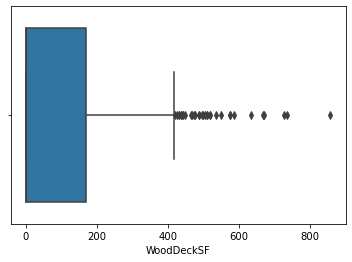

In [1150]:
sns.boxplot(x=data['WoodDeckSF'])

In [1151]:
iqr = stats.iqr(data.WoodDeckSF)
iqr

168.0

In [1152]:
Q1 = data.WoodDeckSF.quantile(0.25)
Q1

0.0

In [1153]:
Q3=data.WoodDeckSF.quantile(0.75)
Q3

168.0

In [1154]:
upper_bond_WoodDeckSF = Q3+1.5*iqr
upper_bond_WoodDeckSF

420.0

In [1155]:
lower_bond_WoodDeckSF = Q1-1.5*iqr
lower_bond_WoodDeckSF

-252.0

In [1156]:
data.WoodDeckSF = np.where(data.WoodDeckSF>upper_bond_WoodDeckSF,upper_bond_WoodDeckSF,data.WoodDeckSF)

In [1157]:
dt=data[data['WoodDeckSF']>420.0]
dt

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [1158]:
 data.WoodDeckSF= np.where(data.WoodDeckSF<lower_bond_WoodDeckSF,lower_bond_WoodDeckSF,data.WoodDeckSF)

In [1159]:
dt=data[data['WoodDeckSF']<-252.0]
dt

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


<AxesSubplot:xlabel='WoodDeckSF'>

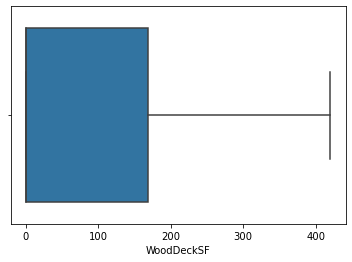

In [1160]:
sns.boxplot(x=data['WoodDeckSF'])

# OpenPorchSF

In [1161]:
data.OpenPorchSF.isnull().sum()

0

<AxesSubplot:xlabel='OpenPorchSF'>

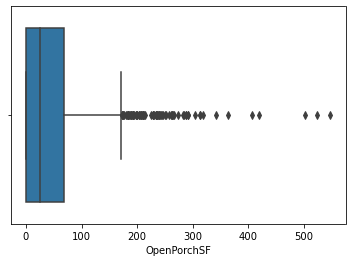

In [1162]:
sns.boxplot(x=data['OpenPorchSF'])

In [1163]:
iqr = stats.iqr(data.OpenPorchSF)
iqr

68.0

In [1164]:
Q1 = data.OpenPorchSF.quantile(0.25)
Q1

0.0

In [1165]:
Q3=data.OpenPorchSF.quantile(0.75)
Q3

68.0

In [1166]:
upper_bond_OpenPorchSF = Q3+1.5*iqr
upper_bond_OpenPorchSF

170.0

In [1167]:
lower_bond_OpenPorchSF = Q1-1.5*iqr
lower_bond_OpenPorchSF

-102.0

In [1168]:
data.OpenPorchSF = np.where(data.OpenPorchSF>upper_bond_OpenPorchSF,upper_bond_OpenPorchSF,data.OpenPorchSF)

In [1169]:
dt=data[data['OpenPorchSF']>170.0]
dt

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [1170]:
 data.OpenPorchSF= np.where(data.OpenPorchSF<lower_bond_OpenPorchSF,lower_bond_OpenPorchSF,data.OpenPorchSF)

In [1171]:
dt=data[data['OpenPorchSF']<-102.0]
dt

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


<AxesSubplot:xlabel='OpenPorchSF'>

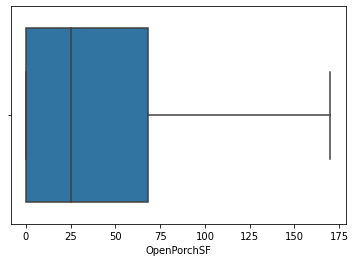

In [1172]:
sns.boxplot(x=data['OpenPorchSF'])

# EnclosedPorch

In [1173]:
data.EnclosedPorch.value_counts()

0      1252
112      15
96        6
192       5
144       5
       ... 
54        1
136       1
148       1
140       1
99        1
Name: EnclosedPorch, Length: 120, dtype: int64

In [1174]:
data.EnclosedPorch.unique()

array([  0, 272, 228, 205, 176,  87, 172, 102,  37, 144,  64, 114, 202,
       128, 156,  44,  77, 192, 140, 180, 183,  39, 184,  40, 552,  30,
       126,  96,  60, 150, 120, 112, 252,  52, 224, 234, 244, 268, 137,
        24, 108, 294, 177, 218, 242,  91, 160, 130, 169, 105,  34, 248,
       236,  32,  80, 115, 291, 116, 158, 210,  36, 200,  84, 148, 136,
       240,  54, 100, 189, 293, 164, 216, 239,  67,  90,  56, 129,  98,
       143,  70, 386, 154, 185, 134, 196, 264, 275, 230, 254,  68, 194,
       318,  48,  94, 138, 226, 174,  19, 170, 220, 214, 280, 190, 330,
       208, 145, 259,  81,  42, 123, 162, 286, 168,  20, 301, 198, 221,
       212,  50,  99], dtype=int64)

In [1175]:
data.drop(columns ='EnclosedPorch',axis=1,inplace=True )

In [1176]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', '3SsnPorch', 'ScreenPorch',
       'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition',
       'SalePri

# 3SsnPorch

In [1177]:
data['3SsnPorch'].value_counts()

0      1436
168       3
144       2
180       2
216       2
290       1
153       1
96        1
23        1
162       1
182       1
196       1
320       1
245       1
238       1
508       1
140       1
130       1
407       1
304       1
Name: 3SsnPorch, dtype: int64

In [1178]:
data['3SsnPorch'].isnull().sum()

0

In [1179]:
data.drop(columns = '3SsnPorch',axis = 1,inplace = True)

In [1180]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition',
       'SalePrice'],
      d

#  ScreenPorch

In [1181]:
data.ScreenPorch.isnull().sum()

0

In [1182]:
model=ols('SalePrice~ScreenPorch',data=data).fit()
anova=sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
ScreenPorch,1.0,7.802762e+10,7.802762e+10,17.4707,0.0
Residual,1458.0,6.511727e+12,4.466205e+09,NaN,NaN


In [1183]:
tukey = pairwise_tukeyhsd(data['SalePrice'],data['ScreenPorch'],alpha=0.05)
print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj     lower        upper    reject
-----------------------------------------------------------------
     0     40  -54685.9152    1.0 -336341.9564  226970.126  False
     0     53  -10685.9152    1.0 -292341.9564  270970.126  False
     0     60  -32685.9152    1.0 -314341.9564  248970.126  False
     0     63  -54085.9152    1.0 -335741.9564  227570.126  False
     0     80  -24685.9152    1.0 -306341.9564  256970.126  False
     0     90    4314.0848    1.0 -158420.9642 167049.1339  False
     0     95  -54185.9152    1.0 -335841.9564  227470.126  False
     0     99  -41785.9152    1.0 -323441.9564  239870.126  False
     0    100  -13235.9152    1.0 -212470.8356 185999.0053  False
     0    116   -6685.9152    1.0 -288341.9564  274970.126  False
     0    119    4214.0848    1.0 -277441.9564  285870.126  False
     0    120   -7985.9152    1.0 -134133.4887 118161.6584  False
     0    

In [1184]:
data.ScreenPorch=data.ScreenPorch.replace({40:0,53:0,60:0,63:0,80:0,90:0,95:0,99:0,100:0,116:0,119:0,120:0,122:0,126:0,128:0,130:0,140:0,142:0,143:0,144:0,145:0,147:0,152:0,153:0,154:0,155:0,156:0,160:0,161:0,163:0,165:0,168:0,175:0,176:0,178:0,180:0,182:0,184:0,185:0,189:0,190:0,192:0,197:0,198:0,200:0,204:0,216:0,220:0,222:0,224:0,225:0,233:0,234:0,252:0,259:0,260:0,263:0,265:0,266:0,271:0,273:0,276:0,287:0,288:0,291:0,312:0,322:0,374:0,385:0,396:0,410:0,440:0,480:0})

In [1185]:
tukey = pairwise_tukeyhsd(data['SalePrice'],data['ScreenPorch'],alpha=0.05)
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------
     0    170 130427.5328 0.0164   19297.0929 241557.9727   True
     0    210 162996.2828 0.0399    5887.9763 320104.5893   True
   170    210    32568.75 0.9167 -159782.8445 224920.3445  False
----------------------------------------------------------------


In [1186]:
data.ScreenPorch=data.ScreenPorch.replace({210:170})

In [1187]:
tukey = pairwise_tukeyhsd(data['SalePrice'],data['ScreenPorch'],alpha=0.05)
print(tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2   meandiff  p-adj    lower      upper    reject
-------------------------------------------------------------
     0    170 141283.7828 0.0003 65413.3705 217154.195   True
-------------------------------------------------------------


# PoolArea

In [1188]:
data.PoolArea.value_counts()

0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64

In [1189]:
data.PoolArea.isnull().sum()

0

In [1190]:
data.drop(columns='PoolArea',axis=1,inplace = True)

In [1191]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

# MiscVal      # dropped


In [1192]:
data.MiscVal.value_counts()

0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: MiscVal, dtype: int64

In [1193]:
data.MiscVal.isnull().sum()

0

In [1194]:
data.drop(['MiscVal'],axis=1,inplace=True)

In [1195]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

#  MoSold       # dropped

In [1196]:
data.MoSold.value_counts()

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

In [1197]:
data.MoSold.isnull().sum()

0

In [1198]:
model=ols('SalePrice~MoSold',data=data).fit()
anova=sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
MoSold,1.0,3.053842e+10,3.053842e+10,6.7882,0.0093
Residual,1458.0,6.559217e+12,4.498777e+09,NaN,NaN


In [1199]:
tukey = pairwise_tukeyhsd(data.SalePrice, data.MoSold, alpha=0.05)
print(tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower      upper    reject
--------------------------------------------------------------
     1      2   7956.5172    1.0 -34024.9353 49937.9697  False
     1      3   7570.5927 0.9999 -28332.4934 43473.6789  False
     1      4  -1628.3622    1.0 -35919.3323 32662.6079  False
     1      5   1182.5319    1.0 -31528.8093 33893.8732  False
     1      6   4872.3987    1.0 -27130.0142 36874.8115  False
     1      7   9590.5899 0.9982 -22653.2152 41834.3949  False
     1      8  13653.8041 0.9821 -21406.7783 48714.3866  False
     1      9  22433.0569 0.7981  -17569.265 62435.3788  False
     1     10   6377.8543    1.0 -30718.0919 43473.8006  False
     1     11  18764.0299 0.9034 -19246.9904 56775.0502  False
     1     12  16593.4833 0.9743 -24053.6306 57240.5973  False
     2      3   -385.9245    1.0 -37603.7269 36831.8779  False
     2      4  -9584.8794 0.9993 -45250.0424 26080.2835

In [1200]:
data.drop(['MoSold'],axis=1,inplace=True)

# YrSold     # dropped


In [1201]:
data.YrSold.value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

In [1202]:
data.YrSold.isnull().sum()

0

In [1203]:
model=ols('SalePrice~YrSold',data=data).fit()
anova=sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
YrSold,1.0,6.479998e+09,6.479998e+09,1.4351,0.2311
Residual,1458.0,6.583275e+12,4.515278e+09,NaN,NaN


In [1204]:
data.drop(['YrSold'],axis=1,inplace=True)

In [1205]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

# SaleType

In [1206]:
data.SaleType.value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [1207]:
data.SaleType.isnull().sum()

0

In [1208]:
model=ols('SalePrice~SaleType',data=data).fit()
anova=sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
SaleType,8.0,8.610576e+11,1.076322e+11,27.2618,0.0
Residual,1451.0,5.728697e+12,3.948103e+09,NaN,NaN


In [1209]:
tukey = pairwise_tukeyhsd(data['SalePrice'],data['SaleType'],alpha=0.05)
print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj     lower        upper    reject
-----------------------------------------------------------------
   COD    CWD   66626.7442 0.5235  -35406.7561 168660.2444  False
   COD    Con  125626.7442 0.1271  -15566.8882 266820.3766  False
   COD  ConLD   -5192.3669    1.0  -76741.4824  66356.7485  False
   COD  ConLI   34034.2442 0.9669  -58193.0503 126261.5386  False
   COD  ConLw    -273.2558    1.0  -92500.5503  91954.0386  False
   COD    New  110059.7319    0.0   75443.0124 144676.4514   True
   COD    Oth  -24123.2558 0.9994 -140681.2702  92434.7586  False
   COD     WD    27394.099 0.1128   -2873.0276  57661.2255  False
   CWD    Con      59000.0 0.9765 -110039.6993 228039.6993  False
   CWD  ConLD  -71819.1111 0.6124 -189113.8427  45475.6204  False
   CWD  ConLI     -32592.5 0.9975 -163530.0881  98345.0881  False
   CWD  ConLw     -66900.0  0.812 -197837.5881  64037.5881  False
   CWD    

In [1210]:
data.SaleType=data.SaleType.replace({'CWO':'COD','Con':'COD','ConLD':'COD','ConLI':'COD','ConLw':'COD','Oth':'COD','WD':'COD'})

In [1211]:
tukey = pairwise_tukeyhsd(data['SalePrice'],data['SaleType'],alpha=0.05)
print(tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2  meandiff  p-adj     lower       upper    reject
--------------------------------------------------------------
   COD    CWD 40382.9055 0.4077 -33740.2544 114506.0655  False
   COD    New 83815.8933    0.0  69814.9712  97816.8153   True
   CWD    New 43432.9877 0.3652  -31782.823 118648.7984  False
--------------------------------------------------------------


In [1212]:
data.SaleType=data.SaleType.replace({'CWD':'COD','NEW':'CWD'})

In [1213]:
tukey = pairwise_tukeyhsd(data['SalePrice'],data['SaleType'],alpha=0.05)
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
   COD    New 83695.1671   0.0 71987.8245 95402.5097   True
-----------------------------------------------------------


# SaleCondition

In [1214]:
data.SaleCondition.value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [1215]:
data.SaleCondition.isnull().sum()

0

In [1216]:
model=ols('SalePrice~SaleCondition',data=data).fit()
anova=sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
SaleCondition,5.0,8.749043e+11,1.749809e+11,44.5195,0.0
Residual,1454.0,5.714851e+12,3.930434e+09,NaN,NaN


In [1217]:
tukey = pairwise_tukeyhsd(data['SalePrice'],data['SaleCondition'],alpha=0.05)
print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
 group1  group2   meandiff  p-adj     lower        upper    reject
------------------------------------------------------------------
Abnorml AdjLand -38392.0941 0.8364 -129594.1596  52809.9715  False
Abnorml  Alloca  23271.7809 0.8293   -31352.863  77896.4249  False
Abnorml  Family   7082.9059 0.9974  -36701.3232  50867.1351  False
Abnorml  Normal  30793.9936    0.0   12257.9865  49330.0007   True
Abnorml Partial 109364.1259   -0.0   85428.8062 133299.4457   True
AdjLand  Alloca   61663.875 0.5295  -41621.7971 164949.5471  False
AdjLand  Family     45475.0 0.7716  -52510.3921 143460.3921  False
AdjLand  Normal  69186.0876 0.2367  -20411.1327  158783.308  False
AdjLand Partial   147756.22 0.0001   56888.3056 238624.1344   True
 Alloca  Family  -16188.875 0.9811  -81512.4697  49134.7197  False
 Alloca  Normal   7522.2126 0.9985  -44378.6242  59423.0495  False
 Alloca Partial   86092.345 0.0001   32027.4503 140157.2397   

In [1218]:
data.SaleCondition=data.SaleCondition.replace({'AdjLand':'Abnorml','Alloca':'Abnorml','Family':'Abnorml'})

In [1219]:
tukey = pairwise_tukeyhsd(data['SalePrice'],data['SaleCondition'],alpha=0.05)
print(tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
 group1  group2  meandiff  p-adj   lower       upper    reject
--------------------------------------------------------------
Abnorml  Normal 28842.5256   0.0 15575.9035  42109.1477   True
Abnorml Partial 107412.658   0.0 89218.0051 125607.3108   True
 Normal Partial 78570.1324   0.0 64743.8658  92396.3989   True
--------------------------------------------------------------


In [1220]:
data.shape

(1460, 61)

In [1221]:
numeric = data.select_dtypes(include='number')

In [1222]:
numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1460 non-null   int64  
 1   LotFrontage   1460 non-null   float64
 2   LotArea       1460 non-null   float64
 3   OverallQual   1460 non-null   int64  
 4   OverallCond   1460 non-null   int64  
 5   YearBuilt     1460 non-null   float64
 6   YearRemodAdd  1460 non-null   int64  
 7   BsmtFinSF1    1460 non-null   float64
 8   BsmtUnfSF     1460 non-null   float64
 9   TotalBsmtSF   1460 non-null   float64
 10  1stFlrSF      1460 non-null   float64
 11  2ndFlrSF      1460 non-null   float64
 12  LowQualFinSF  1460 non-null   int64  
 13  GrLivArea     1460 non-null   float64
 14  BsmtFullBath  1460 non-null   int64  
 15  FullBath      1460 non-null   int64  
 16  HalfBath      1460 non-null   int64  
 17  BedroomAbvGr  1460 non-null   int64  
 18  KitchenAbvGr  1460 non-null 

In [1223]:
numeric.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'ScreenPorch', 'SalePrice'],
      dtype='object')

In [1224]:
b = []

for i in numeric:
    if len(data[i].unique())>25:
        b.append(i)

In [1225]:
print(b)

['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']


In [1226]:
data_conti = data[b]

In [1227]:
data_conti

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,65.0,8450.0,2003.0,2003,706.0,150.0,856.0,856.0,854.0,1710.0,2003.0,548.0,0.0,61.0,208500.0
1,80.0,9600.0,1976.0,1976,978.0,284.0,1262.0,1262.0,0.0,1262.0,1976.0,460.0,298.0,0.0,181500.0
2,68.0,11250.0,2001.0,2002,486.0,434.0,920.0,920.0,866.0,1786.0,2001.0,608.0,0.0,42.0,223500.0
3,60.0,9550.0,1915.0,1970,216.0,540.0,756.0,961.0,756.0,1717.0,1998.0,642.0,0.0,35.0,140000.0
4,84.0,14260.0,2000.0,2000,655.0,490.0,1145.0,1145.0,1053.0,2198.0,2000.0,836.0,192.0,84.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917.0,1999.0,2000,0.0,953.0,953.0,953.0,694.0,1647.0,1999.0,460.0,0.0,40.0,175000.0
1456,85.0,13175.0,1978.0,1988,790.0,589.0,1542.0,2073.0,0.0,2073.0,1978.0,500.0,349.0,0.0,210000.0
1457,66.0,9042.0,1941.0,2006,275.0,877.0,1152.0,1188.0,1152.0,2340.0,1941.0,252.0,0.0,60.0,266500.0
1458,68.0,9717.0,1950.0,1996,49.0,0.0,1078.0,1078.0,0.0,1078.0,1950.0,240.0,366.0,0.0,142125.0


In [1228]:
data_conti.corr()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
LotFrontage,1.000000,0.579385,0.140115,0.077565,0.144167,0.149535,0.336444,0.392061,0.069358,0.341141,0.076810,0.345119,0.102325,0.147060,0.375850
LotArea,0.579385,1.000000,0.065765,0.054472,0.215825,0.087068,0.361769,0.458118,0.121725,0.433877,0.013227,0.344650,0.198311,0.162026,0.435876
YearBuilt,0.140115,0.065765,1.000000,0.594909,0.252815,0.145236,0.410450,0.288418,0.011488,0.214627,0.779098,0.487439,0.238377,0.262130,0.570327
YearRemodAdd,0.077565,0.054472,0.594909,1.000000,0.126339,0.178277,0.301581,0.246660,0.140013,0.296841,0.616705,0.377331,0.222702,0.280916,0.552061
BsmtFinSF1,0.144167,0.215825,0.252815,0.126339,1.000000,-0.524935,0.467355,0.395393,-0.157613,0.138405,0.147043,0.278350,0.209159,0.088830,0.387586
BsmtUnfSF,0.149535,0.087068,0.145236,0.178277,-0.524935,1.000000,0.427672,0.317715,0.008717,0.245858,0.181550,0.178489,-0.009997,0.150560,0.216006
TotalBsmtSF,0.336444,0.361769,0.410450,0.301581,0.467355,0.427672,1.000000,0.807158,-0.206180,0.404365,0.320382,0.485659,0.241778,0.249657,0.645251
1stFlrSF,0.392061,0.458118,0.288418,0.246660,0.395393,0.317715,0.807158,1.000000,-0.227037,0.526720,0.227885,0.487426,0.238082,0.204386,0.621873
2ndFlrSF,0.069358,0.121725,0.011488,0.140013,-0.157613,0.008717,-0.206180,-0.227037,1.000000,0.691095,0.068403,0.141133,0.089820,0.219093,0.316508
GrLivArea,0.341141,0.433877,0.214627,0.296841,0.138405,0.245858,0.404365,0.526720,0.691095,1.000000,0.225187,0.471376,0.243036,0.347625,0.729311


<AxesSubplot:>

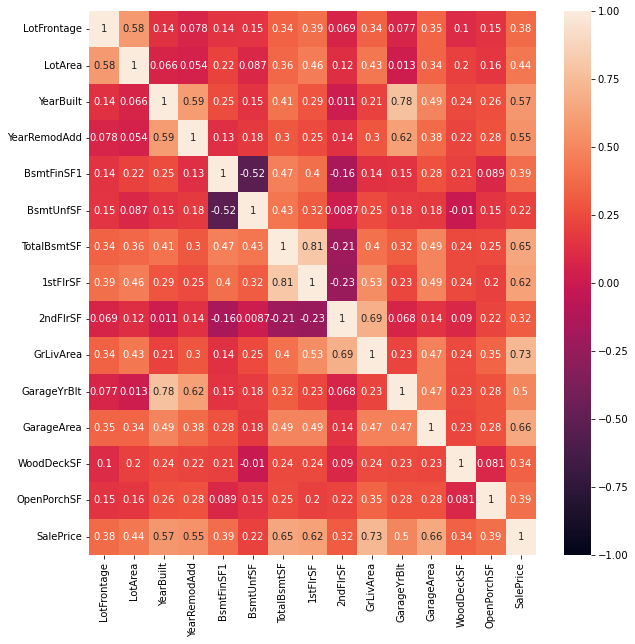

In [1346]:
plt.figure(figsize=(10,10))

sns.heatmap(data_conti.corr(), annot=True, vmin= -1, vmax=1)


In [1230]:
data_conti.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

In [1231]:
x = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']

In [1232]:
vif_da = data[x]

In [1233]:
vif_data = pd.DataFrame()
vif_data["feature"] = vif_da.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(vif_da.values,i) for i in range(len(vif_da.columns))]
  
print(vif_data)

         feature           VIF
0    LotFrontage     27.337851
1        LotArea     14.632186
2      YearBuilt  12889.532721
3   YearRemodAdd  11528.413721
4     BsmtFinSF1     14.904152
5      BsmtUnfSF     19.261022
6    TotalBsmtSF     71.079406
7       1stFlrSF    239.406809
8       2ndFlrSF     42.685806
9      GrLivArea    368.526631
10   GarageYrBlt  17949.054688
11    GarageArea     10.296877
12    WoodDeckSF      1.840004
13   OpenPorchSF      1.966884


In [1234]:
data.drop(columns=['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea'],axis=1,inplace=True)

In [1235]:
numeric = data.select_dtypes(include='number')

In [1236]:
b = []

for i in numeric:
    if len(data[i].unique())>25:
        b.append(i)

In [1237]:
b

['WoodDeckSF', 'OpenPorchSF', 'SalePrice']

In [1238]:
x = ['WoodDeckSF', 'OpenPorchSF']

In [1239]:
vif_da = data[x]

In [1240]:
vif_data = pd.DataFrame()
vif_data["feature"] = vif_da.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(vif_da.values,i) for i in range(len(vif_da.columns))]
  
print(vif_data)

       feature       VIF
0   WoodDeckSF  1.239175
1  OpenPorchSF  1.239175


In [1241]:
a=[]
for i in data.columns:
    if i not in b:
        a.append(i)

In [1242]:
data_cate = data[a]

In [1243]:
for i in a:
    print(i,"+", end=" ")

MSSubClass + MSZoning + LotShape + LandContour + LotConfig + Neighborhood + Condition1 + BldgType + HouseStyle + OverallQual + OverallCond + RoofStyle + RoofMatl + Exterior1st + Exterior2nd + MasVnrType + ExterQual + ExterCond + Foundation + BsmtQual + BsmtCond + BsmtExposure + BsmtFinType1 + Heating + HeatingQC + CentralAir + Electrical + LowQualFinSF + BsmtFullBath + FullBath + HalfBath + BedroomAbvGr + KitchenAbvGr + KitchenQual + TotRmsAbvGrd + Functional + Fireplaces + GarageType + GarageFinish + GarageCars + GarageQual + GarageCond + PavedDrive + ScreenPorch + SaleType + SaleCondition + 

In [1244]:
model = ols("SalePrice ~ MSSubClass + MSZoning + LotShape + LandContour + LotConfig + Neighborhood + Condition1 + BldgType + HouseStyle + OverallQual + OverallCond + RoofStyle + RoofMatl + Exterior1st + Exterior2nd + MasVnrType + ExterQual + ExterCond + Foundation + BsmtQual + BsmtCond + BsmtExposure + BsmtFinType1 + Heating + HeatingQC + CentralAir + Electrical + LowQualFinSF + BsmtFullBath + FullBath + HalfBath + BedroomAbvGr + KitchenAbvGr + KitchenQual + TotRmsAbvGrd + Functional + Fireplaces + GarageType + GarageFinish + GarageCars + GarageQual + GarageCond + PavedDrive + ScreenPorch + SaleType + SaleCondition", data=data).fit()
anova = sm.stats.anova_lm(model)
ano = anova.round(decimals=5)
print(ano)

                   df        sum_sq       mean_sq           F   PR(>F)
MSZoning          2.0  8.849738e+11  4.424869e+11   630.62594  0.00000
LotShape          1.0  2.683350e+11  2.683350e+11   382.42720  0.00000
LandContour       2.0  8.906838e+10  4.453419e+10    63.46949  0.00000
LotConfig         1.0  7.991525e+09  7.991525e+09    11.38941  0.00076
Neighborhood      2.0  1.988640e+12  9.943202e+11  1417.09078  0.00000
Condition1        1.0  2.024826e+09  2.024826e+09     2.88575  0.08959
BldgType          1.0  7.809769e+10  7.809769e+10   111.30370  0.00000
HouseStyle        2.0  1.582220e+11  7.911101e+10   112.74788  0.00000
RoofStyle         1.0  1.053744e+11  1.053744e+11   150.17802  0.00000
RoofMatl          1.0  5.540838e+10  5.540838e+10    78.96722  0.00000
Exterior1st       2.0  2.637762e+11  1.318881e+11   187.96500  0.00000
Exterior2nd       1.0  2.166820e+10  2.166820e+10    30.88121  0.00000
MasVnrType        2.0  1.781921e+11  8.909604e+10   126.97839  0.00000
ExterQ

In [1245]:
droppy=[]
for a, b in ano.iterrows():
    if b[4]>0.05:
        droppy.append(a)

In [1246]:
data.drop(columns=droppy, axis=1, inplace=True)

In [1247]:
a=[]
for i in data.columns:
    if i not in b:
        a.append(i)

In [1248]:
data_cate = data[a]

In [1249]:
for i in a:
    print(i,"+", end=" ")

MSSubClass + MSZoning + LotShape + LandContour + LotConfig + Neighborhood + BldgType + HouseStyle + OverallQual + RoofStyle + RoofMatl + Exterior1st + Exterior2nd + MasVnrType + ExterQual + Foundation + BsmtQual + BsmtCond + BsmtExposure + BsmtFinType1 + Heating + HeatingQC + CentralAir + LowQualFinSF + BsmtFullBath + FullBath + HalfBath + BedroomAbvGr + KitchenAbvGr + KitchenQual + TotRmsAbvGrd + Fireplaces + GarageFinish + GarageCars + WoodDeckSF + OpenPorchSF + ScreenPorch + SaleCondition + SalePrice + 

In [1250]:
model = ols("SalePrice ~ MSSubClass + MSZoning + LotShape + LandContour + LotConfig + Neighborhood + BldgType + HouseStyle + OverallQual + RoofStyle + RoofMatl + Exterior1st + Exterior2nd + MasVnrType + ExterQual + Foundation + BsmtQual + BsmtCond + BsmtExposure + BsmtFinType1 + Heating + HeatingQC + CentralAir + LowQualFinSF + BsmtFullBath + FullBath + HalfBath + BedroomAbvGr + KitchenAbvGr + KitchenQual + TotRmsAbvGrd + Fireplaces + GarageFinish + GarageCars + WoodDeckSF + OpenPorchSF + ScreenPorch + SaleCondition", data=data).fit()
anova = sm.stats.anova_lm(model)
ano = anova.round(decimals=5)
print(ano)

                   df        sum_sq       mean_sq           F   PR(>F)
MSZoning          2.0  8.849738e+11  4.424869e+11   642.06469  0.00000
LotShape          1.0  2.683350e+11  2.683350e+11   389.36394  0.00000
LandContour       2.0  8.906838e+10  4.453419e+10    64.62074  0.00000
LotConfig         1.0  7.991525e+09  7.991525e+09    11.59599  0.00068
Neighborhood      2.0  1.988640e+12  9.943202e+11  1442.79500  0.00000
BldgType          1.0  7.889790e+10  7.889790e+10   114.48374  0.00000
HouseStyle        2.0  1.574528e+11  7.872639e+10   114.23488  0.00000
RoofStyle         1.0  1.055375e+11  1.055375e+11   153.13875  0.00000
RoofMatl          1.0  5.435780e+10  5.435780e+10    78.87517  0.00000
Exterior1st       2.0  2.647259e+11  1.323630e+11   192.06352  0.00000
Exterior2nd       1.0  2.193620e+10  2.193620e+10    31.83024  0.00000
MasVnrType        2.0  1.783339e+11  8.916697e+10   129.38454  0.00000
ExterQual         3.0  4.510927e+11  1.503642e+11   218.18402  0.00000
Founda

## Model - 1

In [1251]:
data.drop(columns=["ScreenPorch"], axis=1, inplace=True)

In [1252]:
data.shape

(1460, 38)

In [1253]:
col = data.columns

In [1254]:
for i in col: print(i, "+", end=" ")

MSSubClass + MSZoning + LotShape + LandContour + LotConfig + Neighborhood + BldgType + HouseStyle + OverallQual + RoofStyle + RoofMatl + Exterior1st + Exterior2nd + MasVnrType + ExterQual + Foundation + BsmtQual + BsmtCond + BsmtExposure + BsmtFinType1 + Heating + HeatingQC + CentralAir + LowQualFinSF + BsmtFullBath + FullBath + HalfBath + BedroomAbvGr + KitchenAbvGr + KitchenQual + TotRmsAbvGrd + Fireplaces + GarageFinish + GarageCars + WoodDeckSF + OpenPorchSF + SaleCondition + SalePrice + 

In [1255]:
trn = data.iloc[0:1000]
tst = data.iloc[1000:1460]

In [1257]:
model_1 = smf.ols(formula= 'SalePrice ~ MSSubClass + MSZoning + LotShape + LandContour + LotConfig + Neighborhood + BldgType + 
                  HouseStyle + OverallQual + RoofStyle + RoofMatl + Exterior1st + Exterior2nd + MasVnrType + ExterQual + 
                  Foundation + BsmtQual + BsmtCond + BsmtExposure + BsmtFinType1 + Heating + HeatingQC + CentralAir + 
                  LowQualFinSF + BsmtFullBath + FullBath + HalfBath + BedroomAbvGr + KitchenAbvGr + KitchenQual + TotRmsAbvGrd +
                  Fireplaces + GarageFinish + GarageCars + WoodDeckSF + OpenPorchSF + SaleCondition', data = trn).fit()

In [1258]:
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     104.9
Date:                Thu, 01 Dec 2022   Prob (F-statistic):               0.00
Time:                        11:20:55   Log-Likelihood:                -11580.
No. Observations:                1000   AIC:                         2.327e+04
Df Residuals:                     945   BIC:                         2.354e+04
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

LotShape[T.IR3] - drop
LandContour[T.HLS], LandContour[T.Lvl] - drop
Neighborhood[T.IDOTRR]
HouseStyle[T.1Story], HouseStyle[T.2Story] - drop
RoofMatl[T.WdShngl] - drop
Exterior2nd[T.BrkFace] - drop
MasVnrType[T.None], MasVnrType[T.Stone] - drop
ExterQual[T.Fa], ExterQual[T.TA]
Foundation[T.PConc] - drop
BsmtCond[T.Gd], BsmtCond[T.Po] - drop
BsmtExposure[T.No]
Heating[T.GasA] - drop
HeatingQC[T.Fa], HeatingQC[T.TA] - drop
CentralAir[T.Y] - drop
GarageFinish[T.Unf]
MSSubClass - drop
LowQualFinSF - drop
HalfBath - drop
KitchenAbvGr - drop

## Model - 2

In [1259]:
droppy = ["LotShape", "LandContour", "HouseStyle", "RoofMatl", "Exterior2nd", "MasVnrType", "Foundation", "BsmtCond", "Heating",
      "HeatingQC", "CentralAir", "MSSubClass", "LowQualFinSF", "HalfBath", "KitchenAbvGr"]

In [1260]:
data.drop(columns=droppy, axis=1, inplace=True)

In [1261]:
data.columns

Index(['MSZoning', 'LotConfig', 'Neighborhood', 'BldgType', 'OverallQual',
       'RoofStyle', 'Exterior1st', 'ExterQual', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFullBath', 'FullBath', 'BedroomAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageFinish',
       'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'SaleCondition',
       'SalePrice'],
      dtype='object')

In [1262]:
data.Neighborhood.replace({"IDOTRR":"Blmngtn"},inplace=True)
data.ExterQual.replace({"Fa":"Ex", "TA":"Ex"},inplace=True)
data.BsmtExposure.replace({"No":"Av"},inplace=True)
data.GarageFinish.replace({"Unf":"Fin"},inplace=True)

In [1263]:
trn = data.iloc[0:1000]
tst = data.iloc[1000:1460]

In [1264]:
col = data.columns

In [1265]:
for i in col: print(i, "+", end=" ")

MSZoning + LotConfig + Neighborhood + BldgType + OverallQual + RoofStyle + Exterior1st + ExterQual + BsmtQual + BsmtExposure + BsmtFinType1 + BsmtFullBath + FullBath + BedroomAbvGr + KitchenQual + TotRmsAbvGrd + Fireplaces + GarageFinish + GarageCars + WoodDeckSF + OpenPorchSF + SaleCondition + SalePrice + 

In [1266]:
model_2 = smf.ols(formula= 'SalePrice ~ MSZoning + LotConfig + Neighborhood + BldgType + OverallQual + RoofStyle + Exterior1st
                  + ExterQual + BsmtQual + BsmtExposure + BsmtFinType1 + BsmtFullBath + FullBath + BedroomAbvGr + KitchenQual
                  + TotRmsAbvGrd + Fireplaces + GarageFinish + GarageCars + WoodDeckSF + OpenPorchSF 
                  + SaleCondition', data = trn).fit()

In [1267]:
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     189.2
Date:                Thu, 01 Dec 2022   Prob (F-statistic):               0.00
Time:                        11:21:31   Log-Likelihood:                -11605.
No. Observations:                1000   AIC:                         2.327e+04
Df Residuals:                     970   BIC:                         2.342e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [1268]:
data.Exterior1st.unique()

array(['CemntBd', 'AsbShng', 'BrkFace'], dtype=object)

In [1269]:
# Exterior1st[T.CemntBd]
data.Exterior1st.replace({"CemntBd":"AsbShng"}, inplace = True)
# data.GarageFinish.value_counts() --- Higher P value

## Model - 3

In [1275]:
data.drop(columns=["GarageFinish"], axis=1, inplace=True)

KeyError: "['GarageFinish'] not found in axis"

In [1276]:
data.columns.shape

(22,)

In [1277]:
trn = data.iloc[0:1000]
tst = data.iloc[1000:1460]

In [1278]:
col = data.columns

In [1279]:
for i in col: print(i, "+", end=" ")

MSZoning + LotConfig + Neighborhood + BldgType + OverallQual + RoofStyle + Exterior1st + ExterQual + BsmtQual + BsmtExposure + BsmtFinType1 + BsmtFullBath + FullBath + BedroomAbvGr + KitchenQual + TotRmsAbvGrd + Fireplaces + GarageCars + WoodDeckSF + OpenPorchSF + SaleCondition + SalePrice + 

In [1281]:
model_3 = smf.ols(formula= 'SalePrice ~ MSZoning + LotConfig + Neighborhood + BldgType + OverallQual + RoofStyle + Exterior1st + ExterQual + BsmtQual + BsmtExposure + BsmtFinType1 + BsmtFullBath + FullBath + BedroomAbvGr + KitchenQual + TotRmsAbvGrd + Fireplaces + GarageCars + WoodDeckSF + OpenPorchSF + SaleCondition', data = trn).fit()
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     202.6
Date:                Thu, 01 Dec 2022   Prob (F-statistic):               0.00
Time:                        12:41:01   Log-Likelihood:                -11607.
No. Observations:                1000   AIC:                         2.327e+04
Df Residuals:                     972   BIC:                         2.341e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [1282]:
model_3 = smf.ols(formula= 'SalePrice ~ MSZoning + LotConfig + Neighborhood + BldgType + OverallQual + RoofStyle + Exterior1st + ExterQual + BsmtQual + BsmtExposure + BsmtFinType1 + BsmtFullBath + FullBath + BedroomAbvGr + KitchenQual + TotRmsAbvGrd + Fireplaces + GarageCars + WoodDeckSF + OpenPorchSF + SaleCondition', data = tst).fit()
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     80.79
Date:                Thu, 01 Dec 2022   Prob (F-statistic):          1.93e-150
Time:                        12:41:37   Log-Likelihood:                -5331.6
No. Observations:                 460   AIC:                         1.072e+04
Df Residuals:                     432   BIC:                         1.083e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [ ]:
MSZoning[T.RH], MSZoning[T.RL] --- drop
RoofStyle[T.Hip] --- drop
SaleCondition[T.Normal], SaleCondition[T.Partial]  --- drop
FullBath --- drop
WoodDeckSF --- drop

In [1283]:
droppy = ["MSZoning", "RoofStyle", "SaleCondition", "FullBath", "WoodDeckSF"]

In [1284]:
data.drop(columns = droppy, axis = 1, inplace = True)

In [1286]:
data.shape

(1460, 17)

# Model 4

In [1287]:
trn = data.iloc[0:1000]
tst = data.iloc[1000:1460]

In [1288]:
col = data.columns

In [1289]:
for i in col: print(i, "+", end=" ")

LotConfig + Neighborhood + BldgType + OverallQual + Exterior1st + ExterQual + BsmtQual + BsmtExposure + BsmtFinType1 + BsmtFullBath + BedroomAbvGr + KitchenQual + TotRmsAbvGrd + Fireplaces + GarageCars + OpenPorchSF + SalePrice + 

In [1290]:
model_3 = smf.ols(formula= 'SalePrice ~ LotConfig + Neighborhood + BldgType + OverallQual + Exterior1st + ExterQual + BsmtQual + BsmtExposure + BsmtFinType1 + BsmtFullBath + BedroomAbvGr + KitchenQual + TotRmsAbvGrd + Fireplaces + GarageCars + OpenPorchSF', data = trn).fit()
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     242.6
Date:                Thu, 01 Dec 2022   Prob (F-statistic):               0.00
Time:                        12:49:39   Log-Likelihood:                -11660.
No. Observations:                1000   AIC:                         2.336e+04
Df Residuals:                     979   BIC:                         2.347e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                9

In [1292]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotConfig     1460 non-null   object 
 1   Neighborhood  1460 non-null   object 
 2   BldgType      1460 non-null   object 
 3   OverallQual   1460 non-null   int64  
 4   Exterior1st   1460 non-null   object 
 5   ExterQual     1460 non-null   object 
 6   BsmtQual      1460 non-null   object 
 7   BsmtExposure  1460 non-null   object 
 8   BsmtFinType1  1460 non-null   object 
 9   BsmtFullBath  1460 non-null   int64  
 10  BedroomAbvGr  1460 non-null   int64  
 11  KitchenQual   1460 non-null   object 
 12  TotRmsAbvGrd  1460 non-null   int64  
 13  Fireplaces    1460 non-null   int64  
 14  GarageCars    1460 non-null   int64  
 15  OpenPorchSF   1460 non-null   float64
 16  SalePrice     1460 non-null   float64
dtypes: float64(2), int64(6), object(9)
memory usage: 194.0+ KB


In [1291]:
model_3 = smf.ols(formula= 'SalePrice ~ LotConfig + Neighborhood + BldgType + OverallQual + Exterior1st + ExterQual + BsmtQual +
                  BsmtExposure + BsmtFinType1 + BsmtFullBath + BedroomAbvGr + KitchenQual + TotRmsAbvGrd + Fireplaces + 
                  GarageCars + OpenPorchSF', data = tst).fit()
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     102.5
Date:                Thu, 01 Dec 2022   Prob (F-statistic):          2.64e-151
Time:                        12:50:08   Log-Likelihood:                -5346.5
No. Observations:                 460   AIC:                         1.073e+04
Df Residuals:                     439   BIC:                         1.082e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1

In [1295]:
data.columns

Index(['LotConfig', 'Neighborhood', 'BldgType', 'OverallQual', 'Exterior1st',
       'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFullBath',
       'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

In [ ]:
plot(slr$data.LotConfig)

In [1296]:
data

,LotConfig,Neighborhood,BldgType,OverallQual,Exterior1st,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFullBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,OpenPorchSF,SalePrice
0,Corner,Blmngtn,1Fam,7,AsbShng,Gd,Gd,Av,GLQ,1,3,Gd,7,0,2,61.0,208500.0
1,Corner,Blmngtn,1Fam,6,AsbShng,Ex,Gd,Gd,ALQ,0,3,TA,6,1,2,0.0,181500.0
2,Corner,Blmngtn,1Fam,7,AsbShng,Gd,Gd,Av,GLQ,1,3,Gd,6,1,2,42.0,223500.0
3,Corner,Blmngtn,1Fam,7,AsbShng,Ex,TA,Av,ALQ,1,3,Gd,7,1,3,35.0,140000.0
4,Corner,StoneBr,1Fam,8,AsbShng,Gd,Gd,Av,GLQ,1,4,Gd,10,1,3,84.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Corner,Blmngtn,1Fam,6,AsbShng,Ex,Gd,Av,ALQ,0,3,TA,7,1,2,40.0,175000.0
1456,Corner,Blmngtn,1Fam,6,BrkFace,Ex,Gd,Av,ALQ,1,3,TA,7,2,2,0.0,210000.0
1457,Corner,Blmngtn,1Fam,7,BrkFace,Ex,TA,Av,GLQ,0,4,Gd,10,2,1,60.0,266500.0
1458,Corner,Blmngtn,1Fam,1,AsbShng,Ex,TA,Av,GLQ,1,0,Gd,5,0,1,0.0,142125.0


In [1298]:
tst.columns

Index(['LotConfig', 'Neighborhood', 'BldgType', 'OverallQual', 'Exterior1st',
       'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFullBath',
       'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

In [1319]:
tst_x = tst.loc[:,tst.columns != 'SalePrice']
tst_y = tst.loc[:,tst.columns == 'SalePrice']

In [1321]:
tst_x

,LotConfig,Neighborhood,BldgType,OverallQual,Exterior1st,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFullBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,OpenPorchSF
1000,Corner,Blmngtn,1Fam,1,AsbShng,Ex,TA,Av,ALQ,0,0,Fa,5,0,2,0.0
1001,Corner,Blmngtn,1Fam,1,AsbShng,Ex,Fa,Av,ALQ,0,0,Ex,5,0,1,20.0
1002,Corner,Blmngtn,1Fam,8,AsbShng,Gd,Gd,Av,GLQ,0,3,Gd,7,1,3,104.0
1003,Corner,Blmngtn,2fmCon,1,AsbShng,Ex,TA,Av,ALQ,0,4,TA,7,0,2,0.0
1004,Corner,Blmngtn,1Fam,7,AsbShng,Gd,Gd,Av,GLQ,0,0,Gd,7,1,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Corner,Blmngtn,1Fam,6,AsbShng,Ex,Gd,Av,ALQ,0,3,TA,7,1,2,40.0
1456,Corner,Blmngtn,1Fam,6,BrkFace,Ex,Gd,Av,ALQ,1,3,TA,7,2,2,0.0
1457,Corner,Blmngtn,1Fam,7,BrkFace,Ex,TA,Av,GLQ,0,4,Gd,10,2,1,60.0
1458,Corner,Blmngtn,1Fam,1,AsbShng,Ex,TA,Av,GLQ,1,0,Gd,5,0,1,0.0


In [1322]:
tst_y

,SalePrice
1000,82000.0
1001,86000.0
1002,232000.0
1003,136905.0
1004,181000.0
...,...
1455,175000.0
1456,210000.0
1457,266500.0
1458,142125.0


In [1323]:
pred_1 = model_3.predict(tst_x)  #Prediction on test data

In [1324]:
pred_1

1000    100041.168832
1001    124098.322483
1002    236762.085166
1003    121230.810643
1004    195375.556017
            ...      
1455    172354.618803
1456    200368.758445
1457    224034.454878
1458    117955.039592
1459    138149.157333
Length: 460, dtype: float64

In [1325]:
y_test_series = tst_y.iloc[:,0] 

In [1326]:
resd_1 = y_test_series - pred_1 #Residuals

In [1327]:
resd_1

1000   -18041.168832
1001   -38098.322483
1002    -4762.085166
1003    15674.189357
1004   -14375.556017
            ...     
1455     2645.381197
1456     9631.241555
1457    42465.545122
1458    24169.960408
1459     9350.842667
Length: 460, dtype: float64

In [1328]:
se_1=resd_1.pow(2) #Square of errors
se_1

1000    3.254838e+08
1001    1.451482e+09
1002    2.267746e+07
1003    2.456802e+08
1004    2.066566e+08
            ...     
1455    6.998042e+06
1456    9.276081e+07
1457    1.803323e+09
1458    5.841870e+08
1459    8.743826e+07
Length: 460, dtype: float64

In [1329]:
#Sum of Squared errors/residuals
sse_1 = se_1.sum()
sse_1

335524140200.46704

In [1330]:
#Mean sum squared errors
msse_1=sse_1/len(se_1)
msse_1

729400304.783624

In [1331]:
import math

#sqr root of mean sum squared errors
math.sqrt(msse_1)

27007.412034173583

C:\Users\T Yashwanth Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

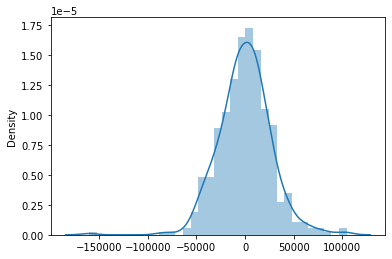

In [1333]:
sns.distplot(resd_1)

C:\Users\T Yashwanth Kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

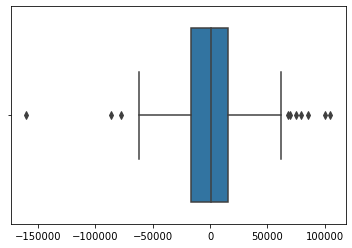

In [1334]:
sns.boxplot(resd_1,orient = 'h')

<AxesSubplot:xlabel='OpenPorchSF', ylabel='SalePrice'>

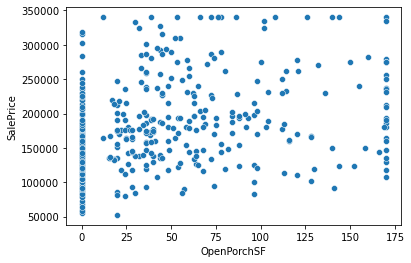

In [1344]:
sns.scatterplot(data=tst,y= tst.SalePrice,x = tst.OpenPorchSF)

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

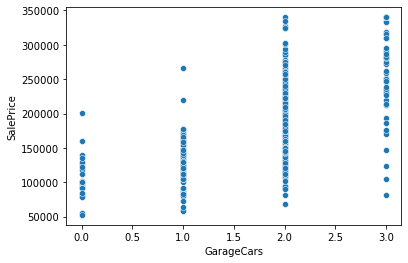

In [1345]:
sns.scatterplot(data=tst,y= tst.SalePrice,x = tst.GarageCars)

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

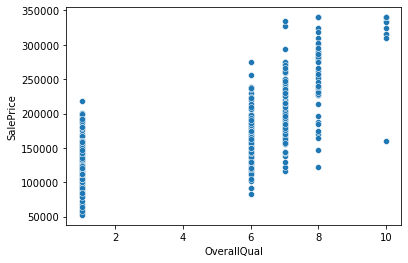

In [1341]:
sns.scatterplot(data=tst,y= tst.SalePrice,x = tst.OverallQual)

In [ ]:
'LotConfig', 'Neighborhood', 'BldgType', 'OverallQual', 'Exterior1st',
       'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFullBath',
       'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'OpenPorchSF'